In [19]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pylab as plt
import numpy as np 


In [3]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

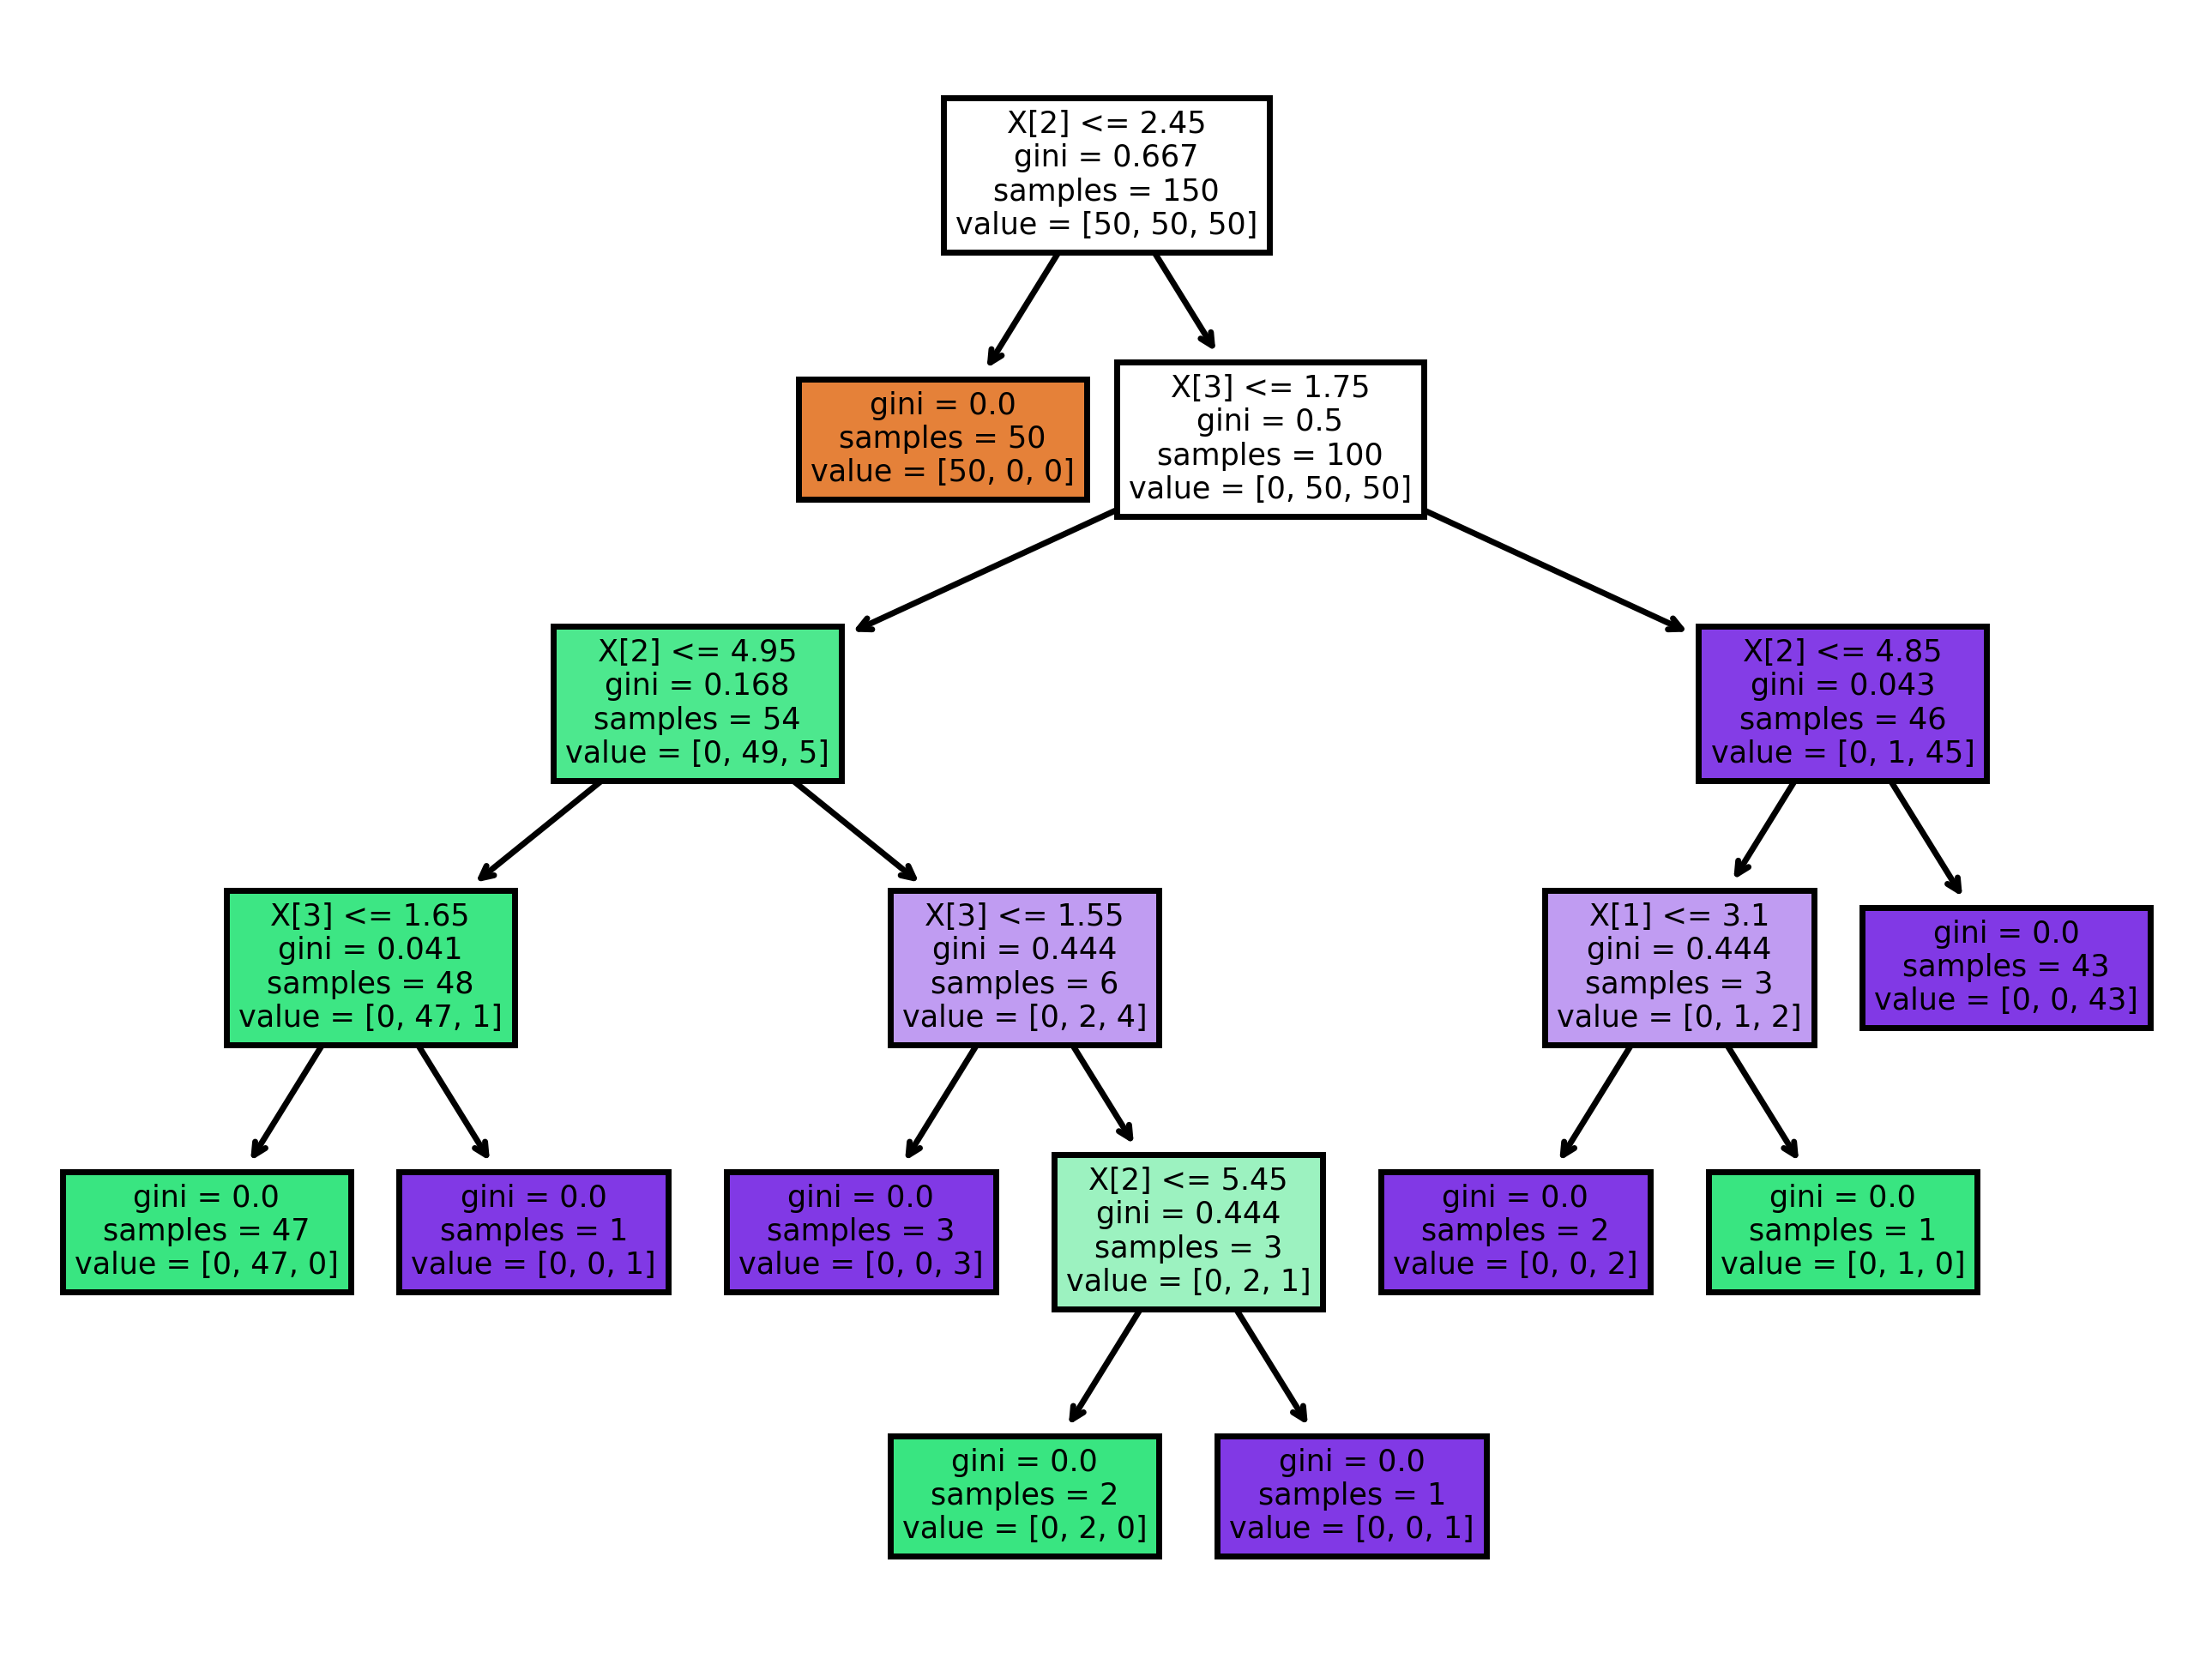

In [5]:
plt.figure(dpi=500)
ax = plt.gca()
tree.plot_tree(clf, ax=ax, filled=True)
plt.savefig('pdf/tree_iris.pdf')

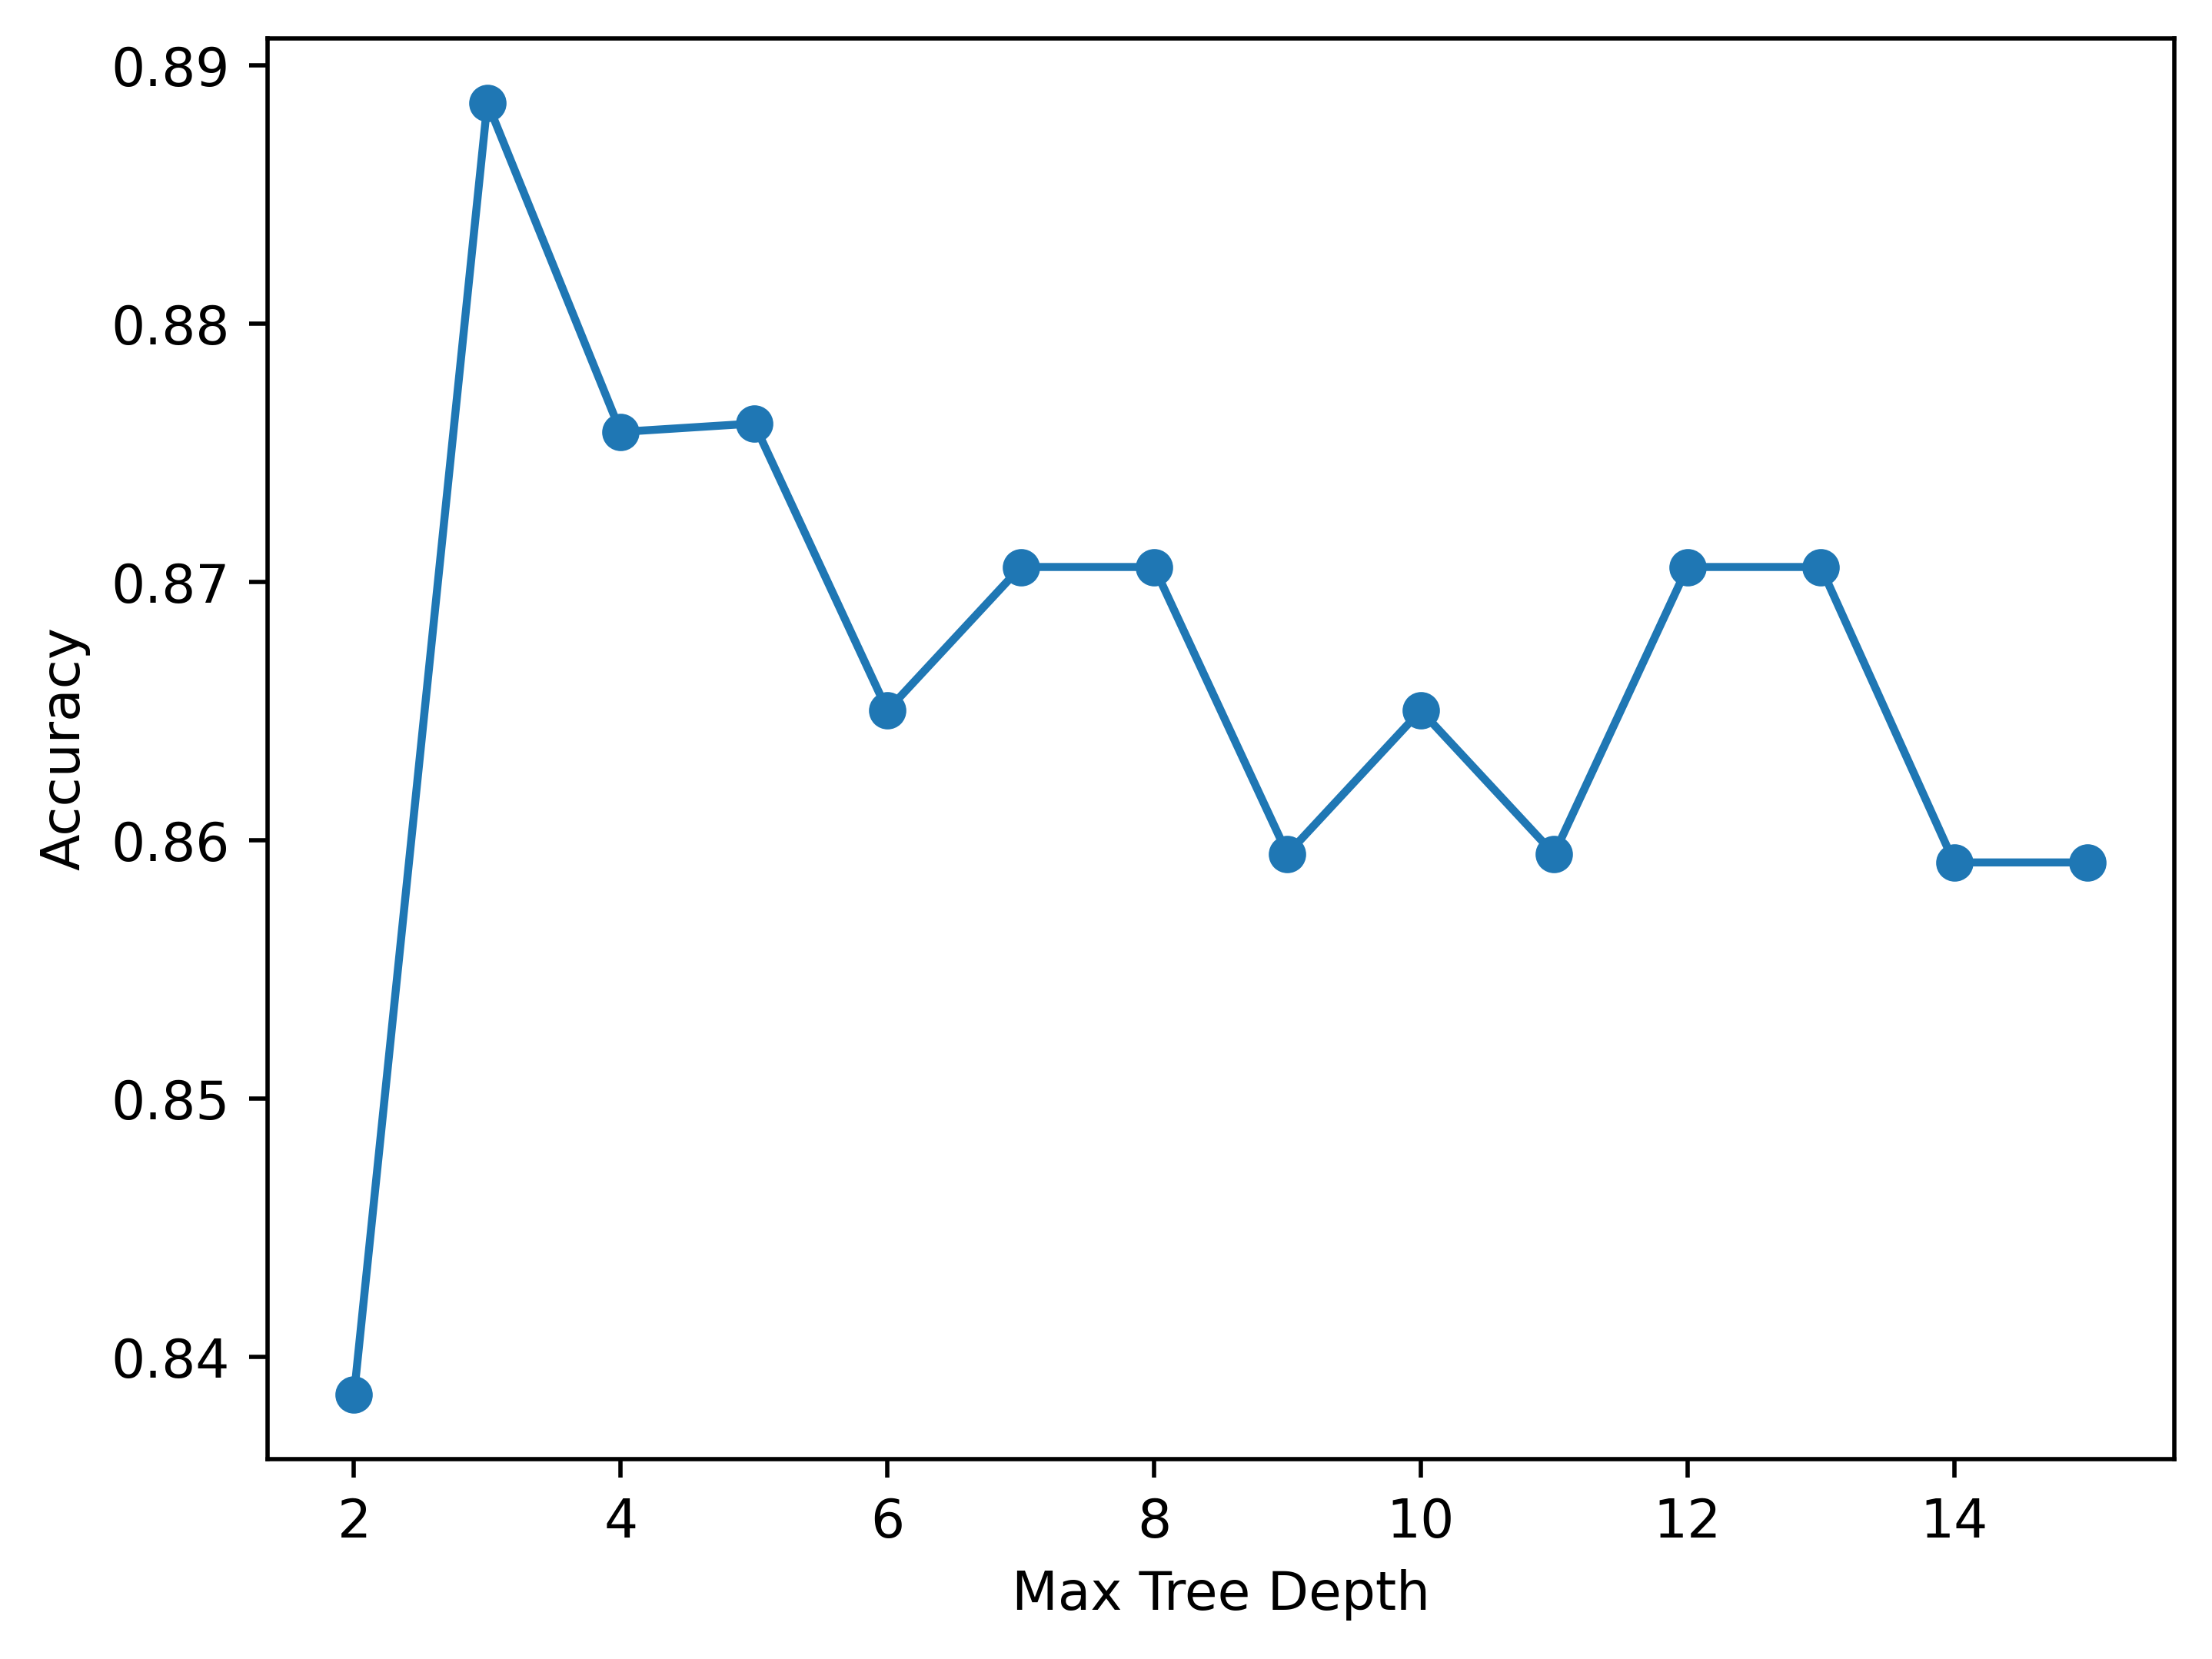

In [6]:
wine = load_wine()
X, y = wine.data, wine.target

depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
scores = np.zeros(len(depths))

for i, d in enumerate(depths): 
    scores[i] = cross_val_score(tree.DecisionTreeClassifier(max_depth=d), X, y, cv=10).mean()
    
plt.figure(dpi=500)
plt.plot(depths, scores, marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.savefig('pdf/tree_wine_perf.pdf')


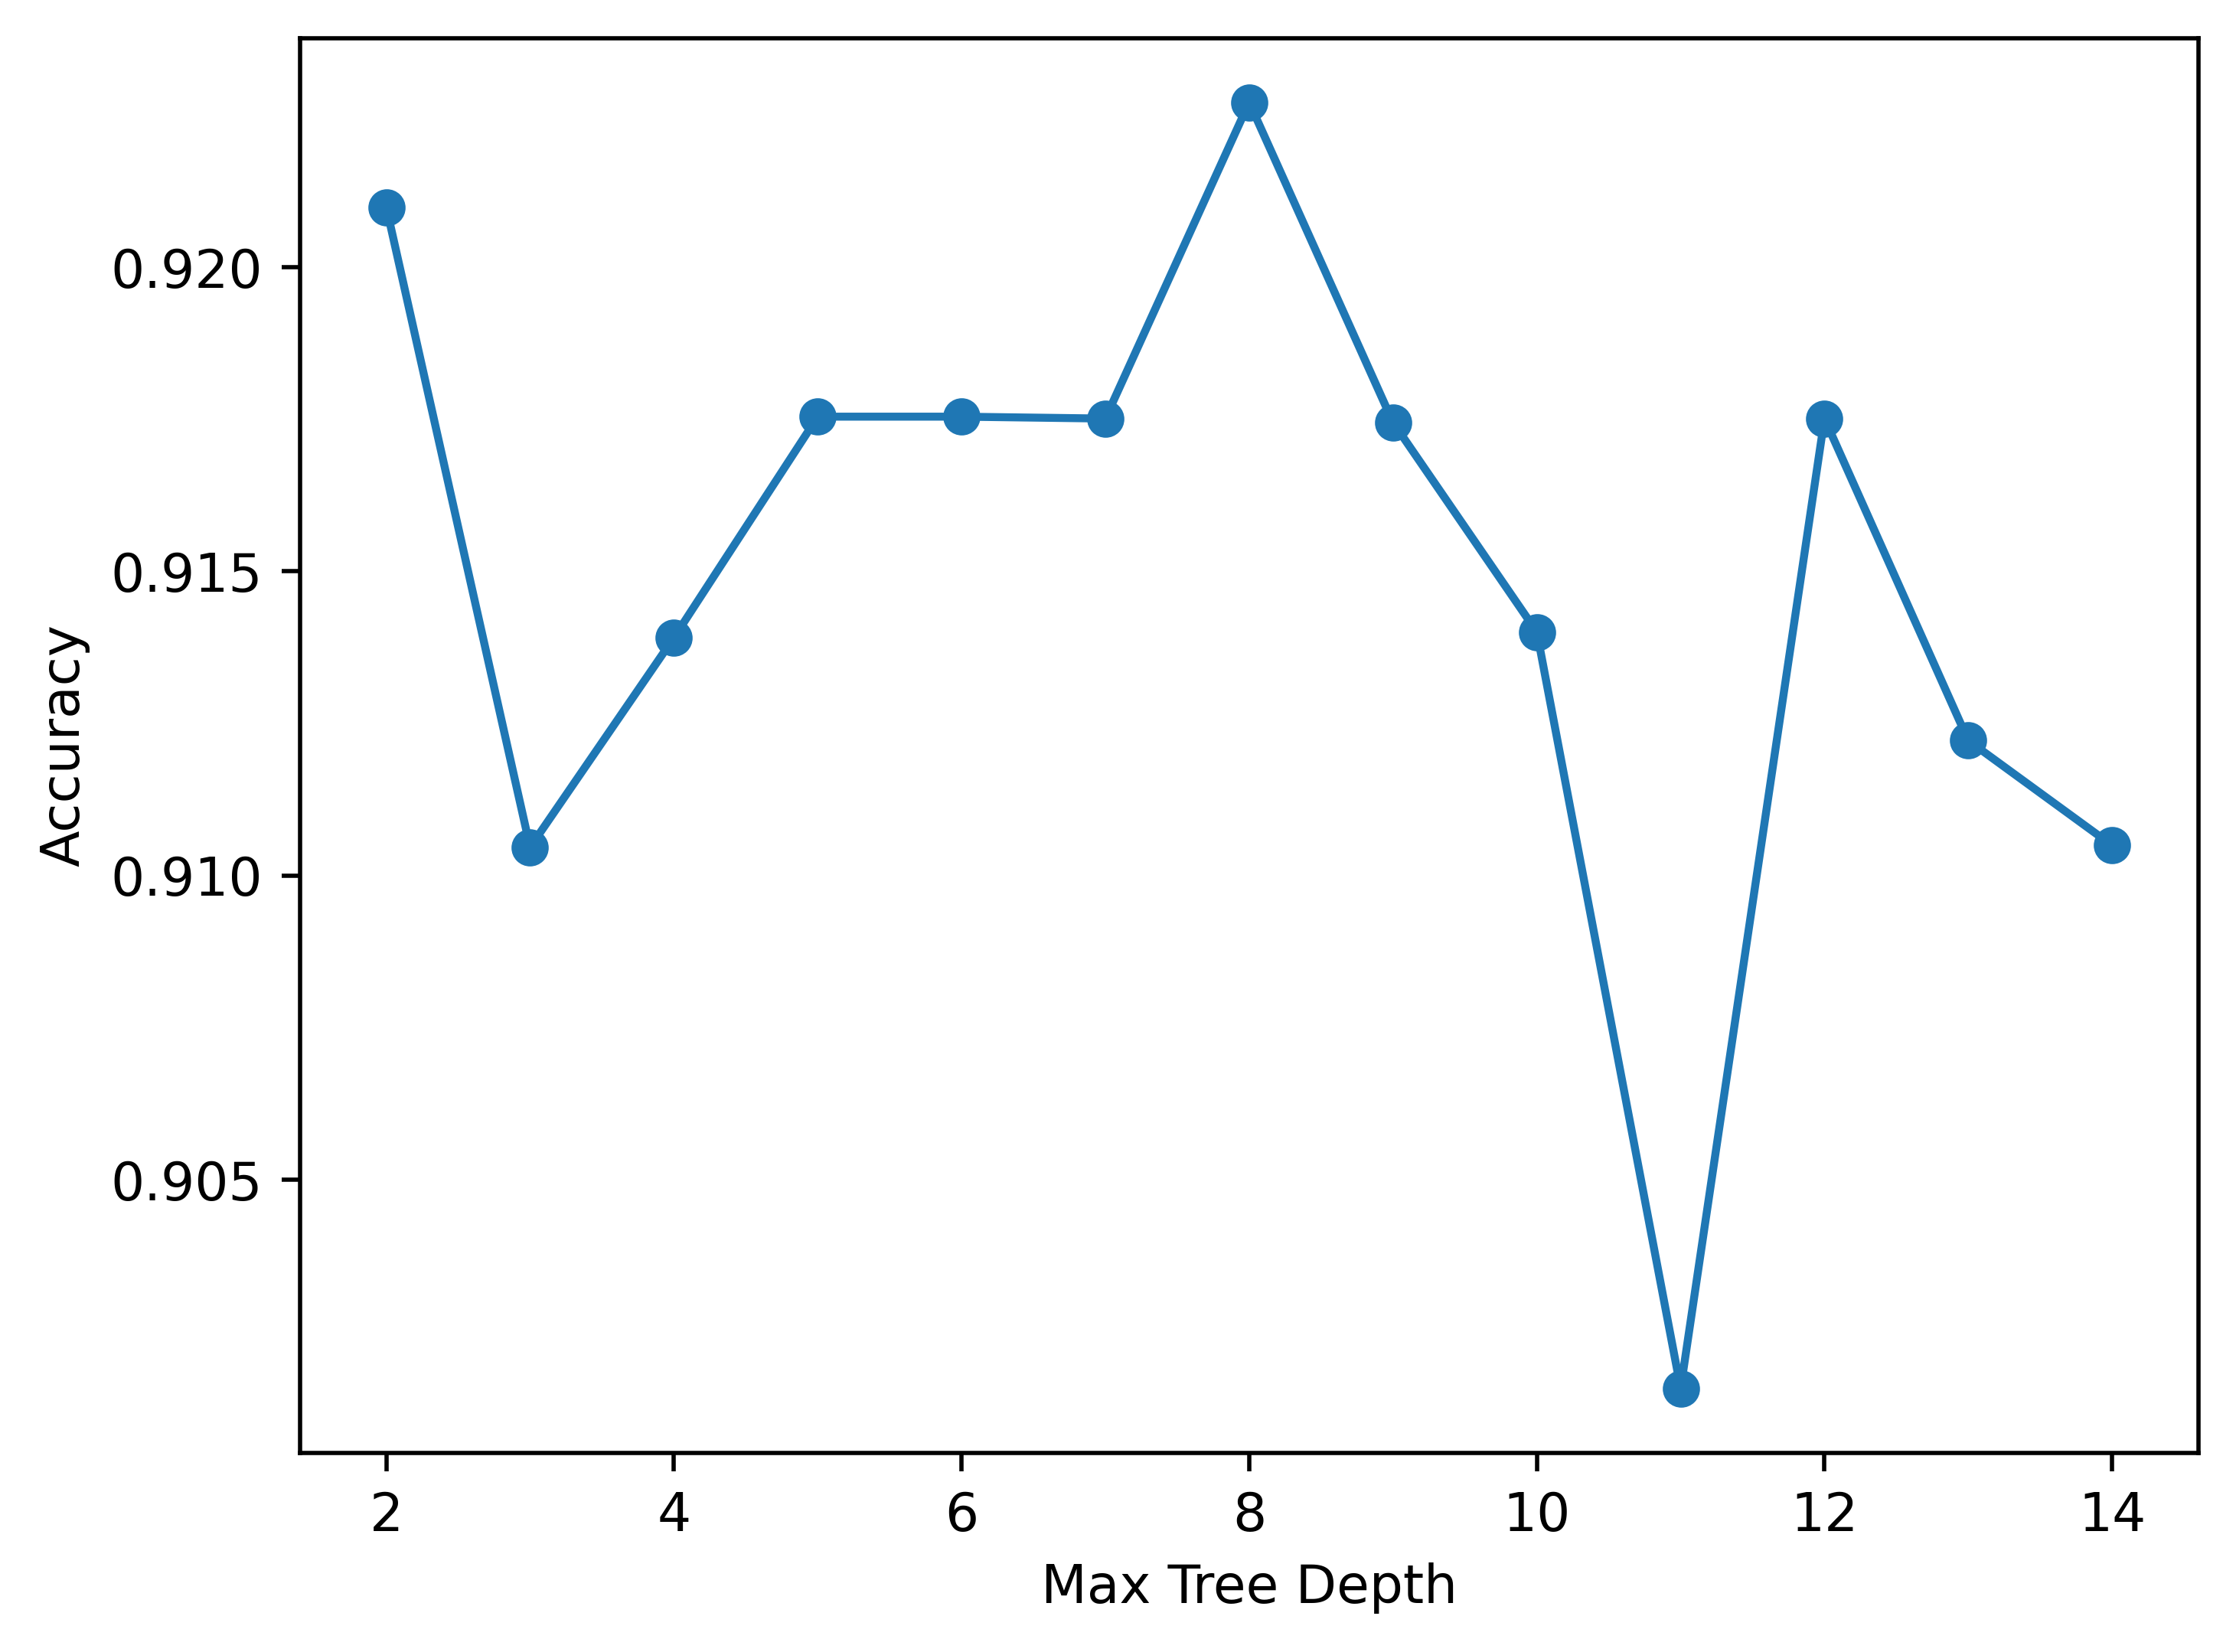

In [7]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
scores = np.zeros(len(depths))

for i, d in enumerate(depths): 
    scores[i] = cross_val_score(tree.DecisionTreeClassifier(max_depth=d), X, y, cv=10).mean()
    
plt.figure(dpi=500)
plt.plot(depths, scores, marker='o')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.savefig('pdf/tree_cancer_perf.pdf')


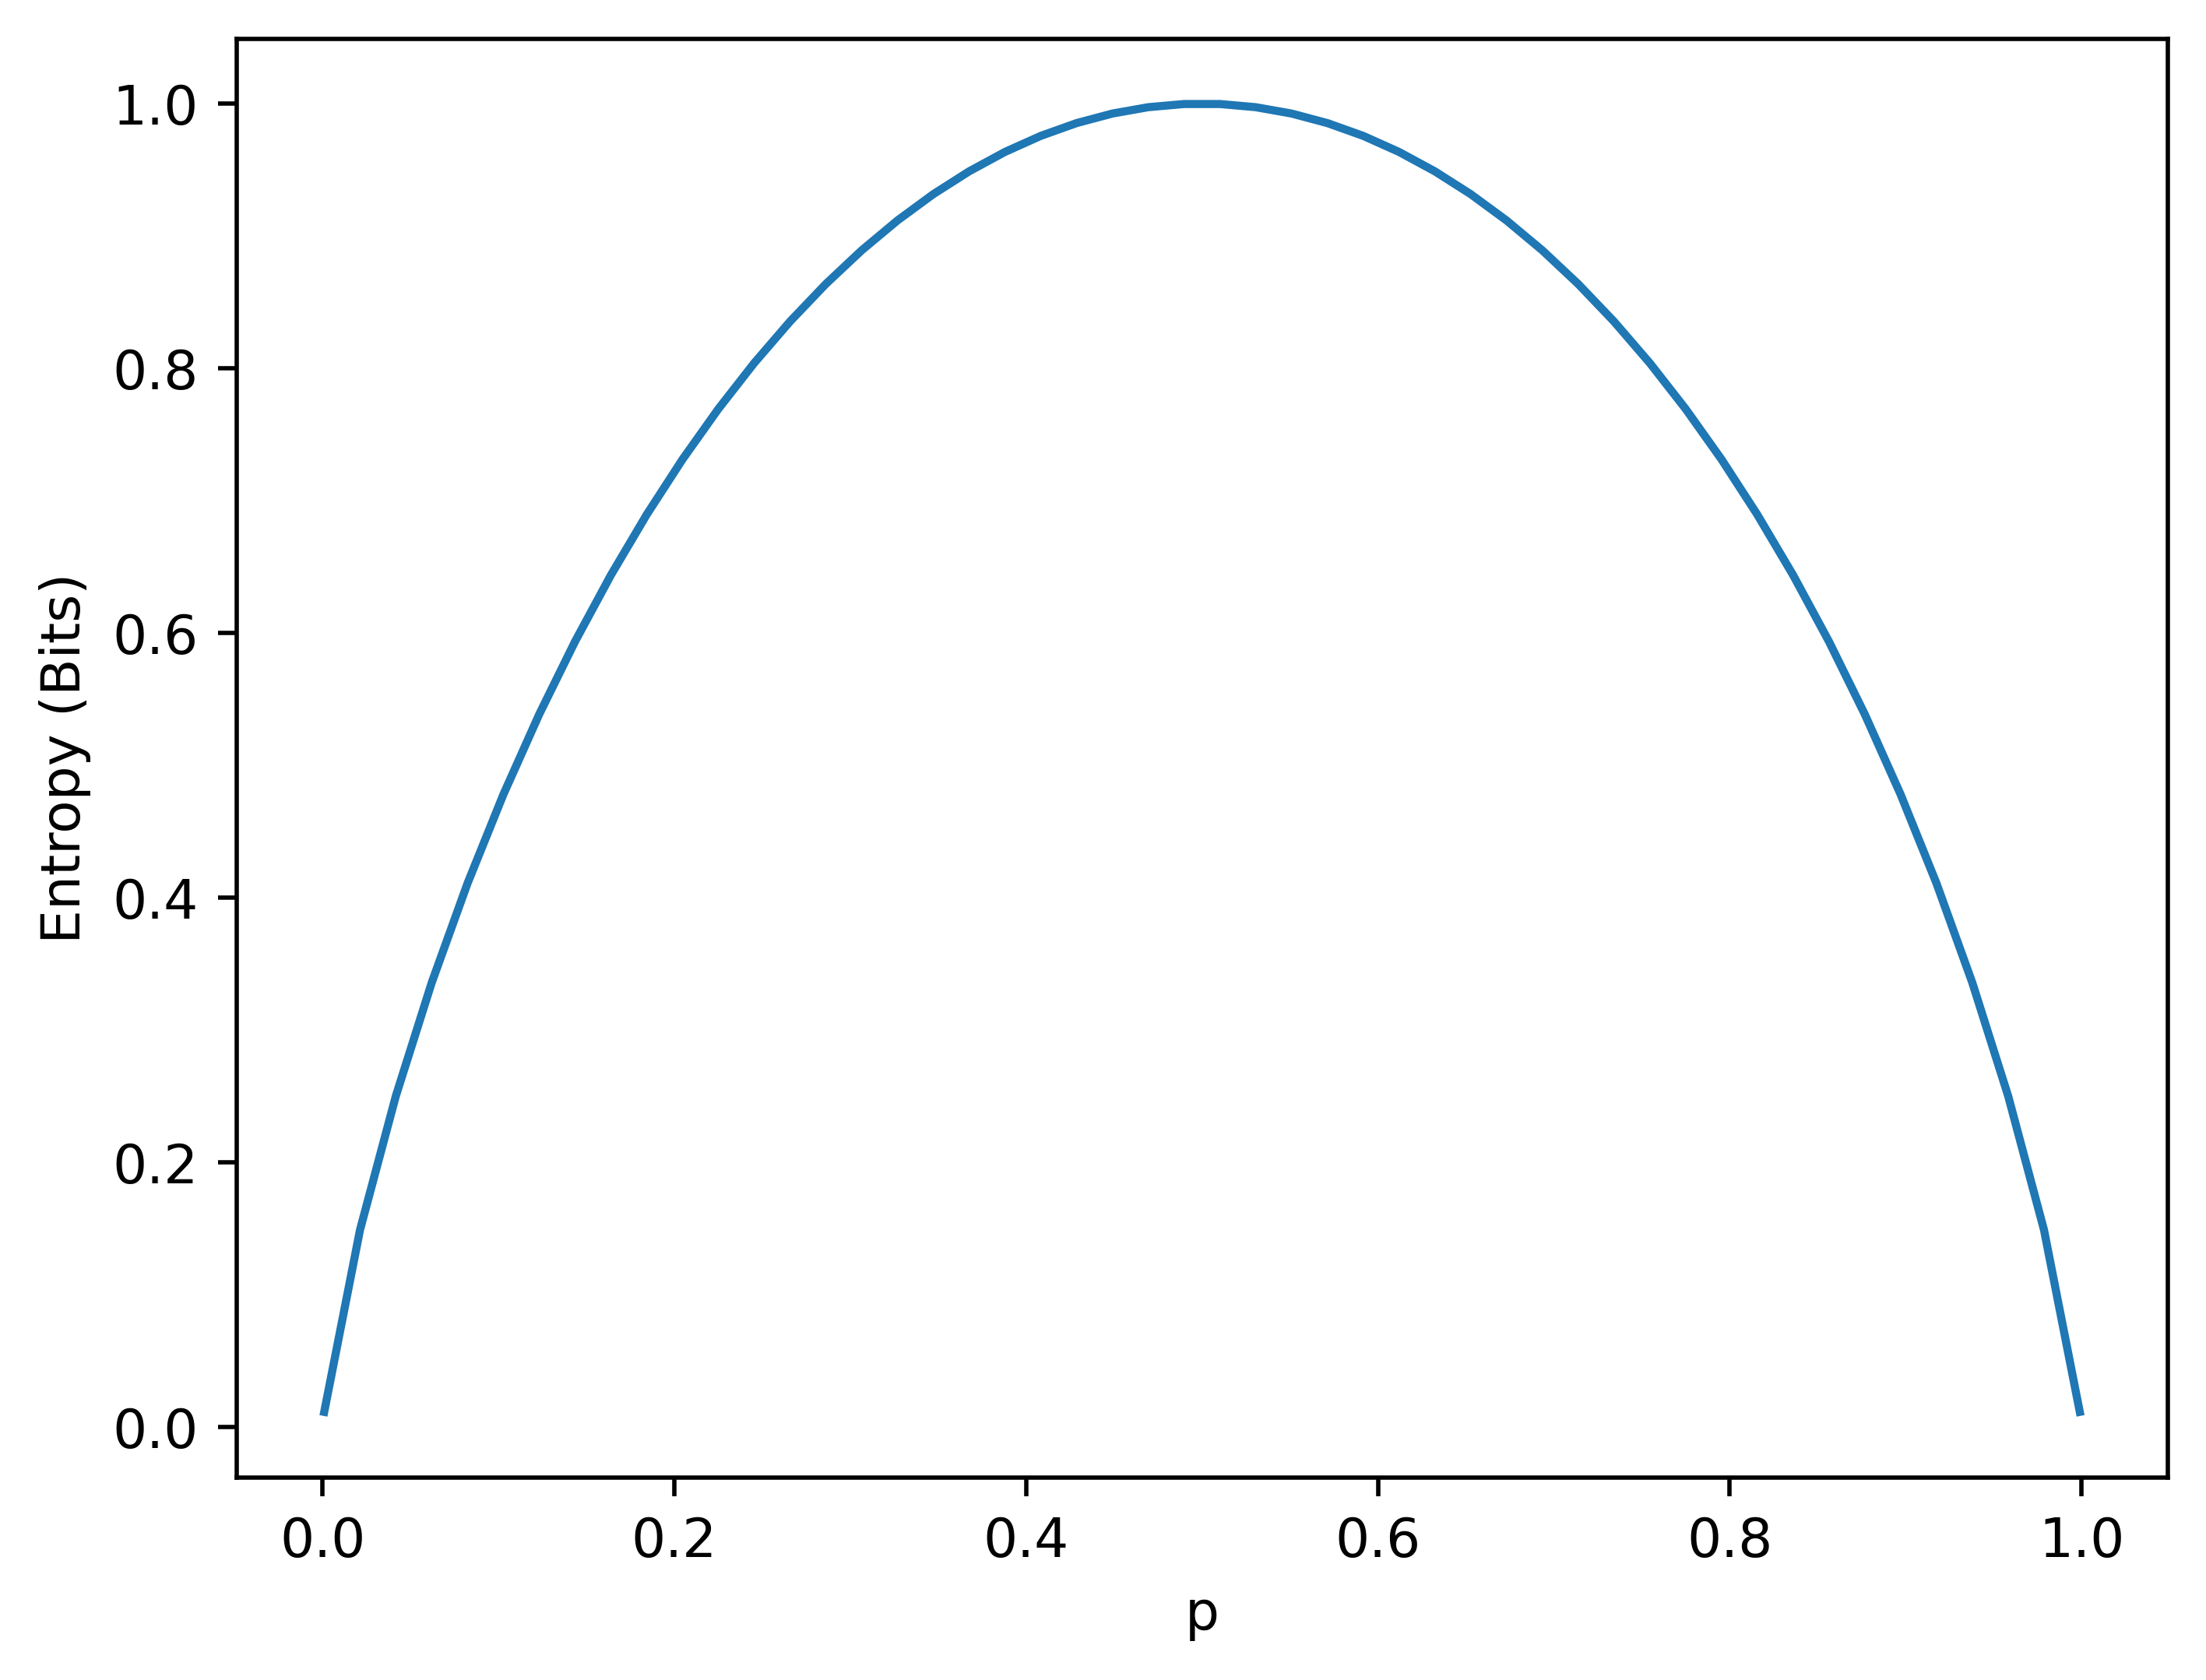

In [8]:
p = np.linspace(0.001, 0.999) 

y = -p*np.log(p)/np.log(2) - (1-p)*np.log(1-p)/np.log(2)

plt.figure(dpi=500)
plt.plot(p, y)
plt.xlabel('p')
plt.ylabel('Entropy (Bits)')
plt.savefig('pdf/tree_entropy.pdf')


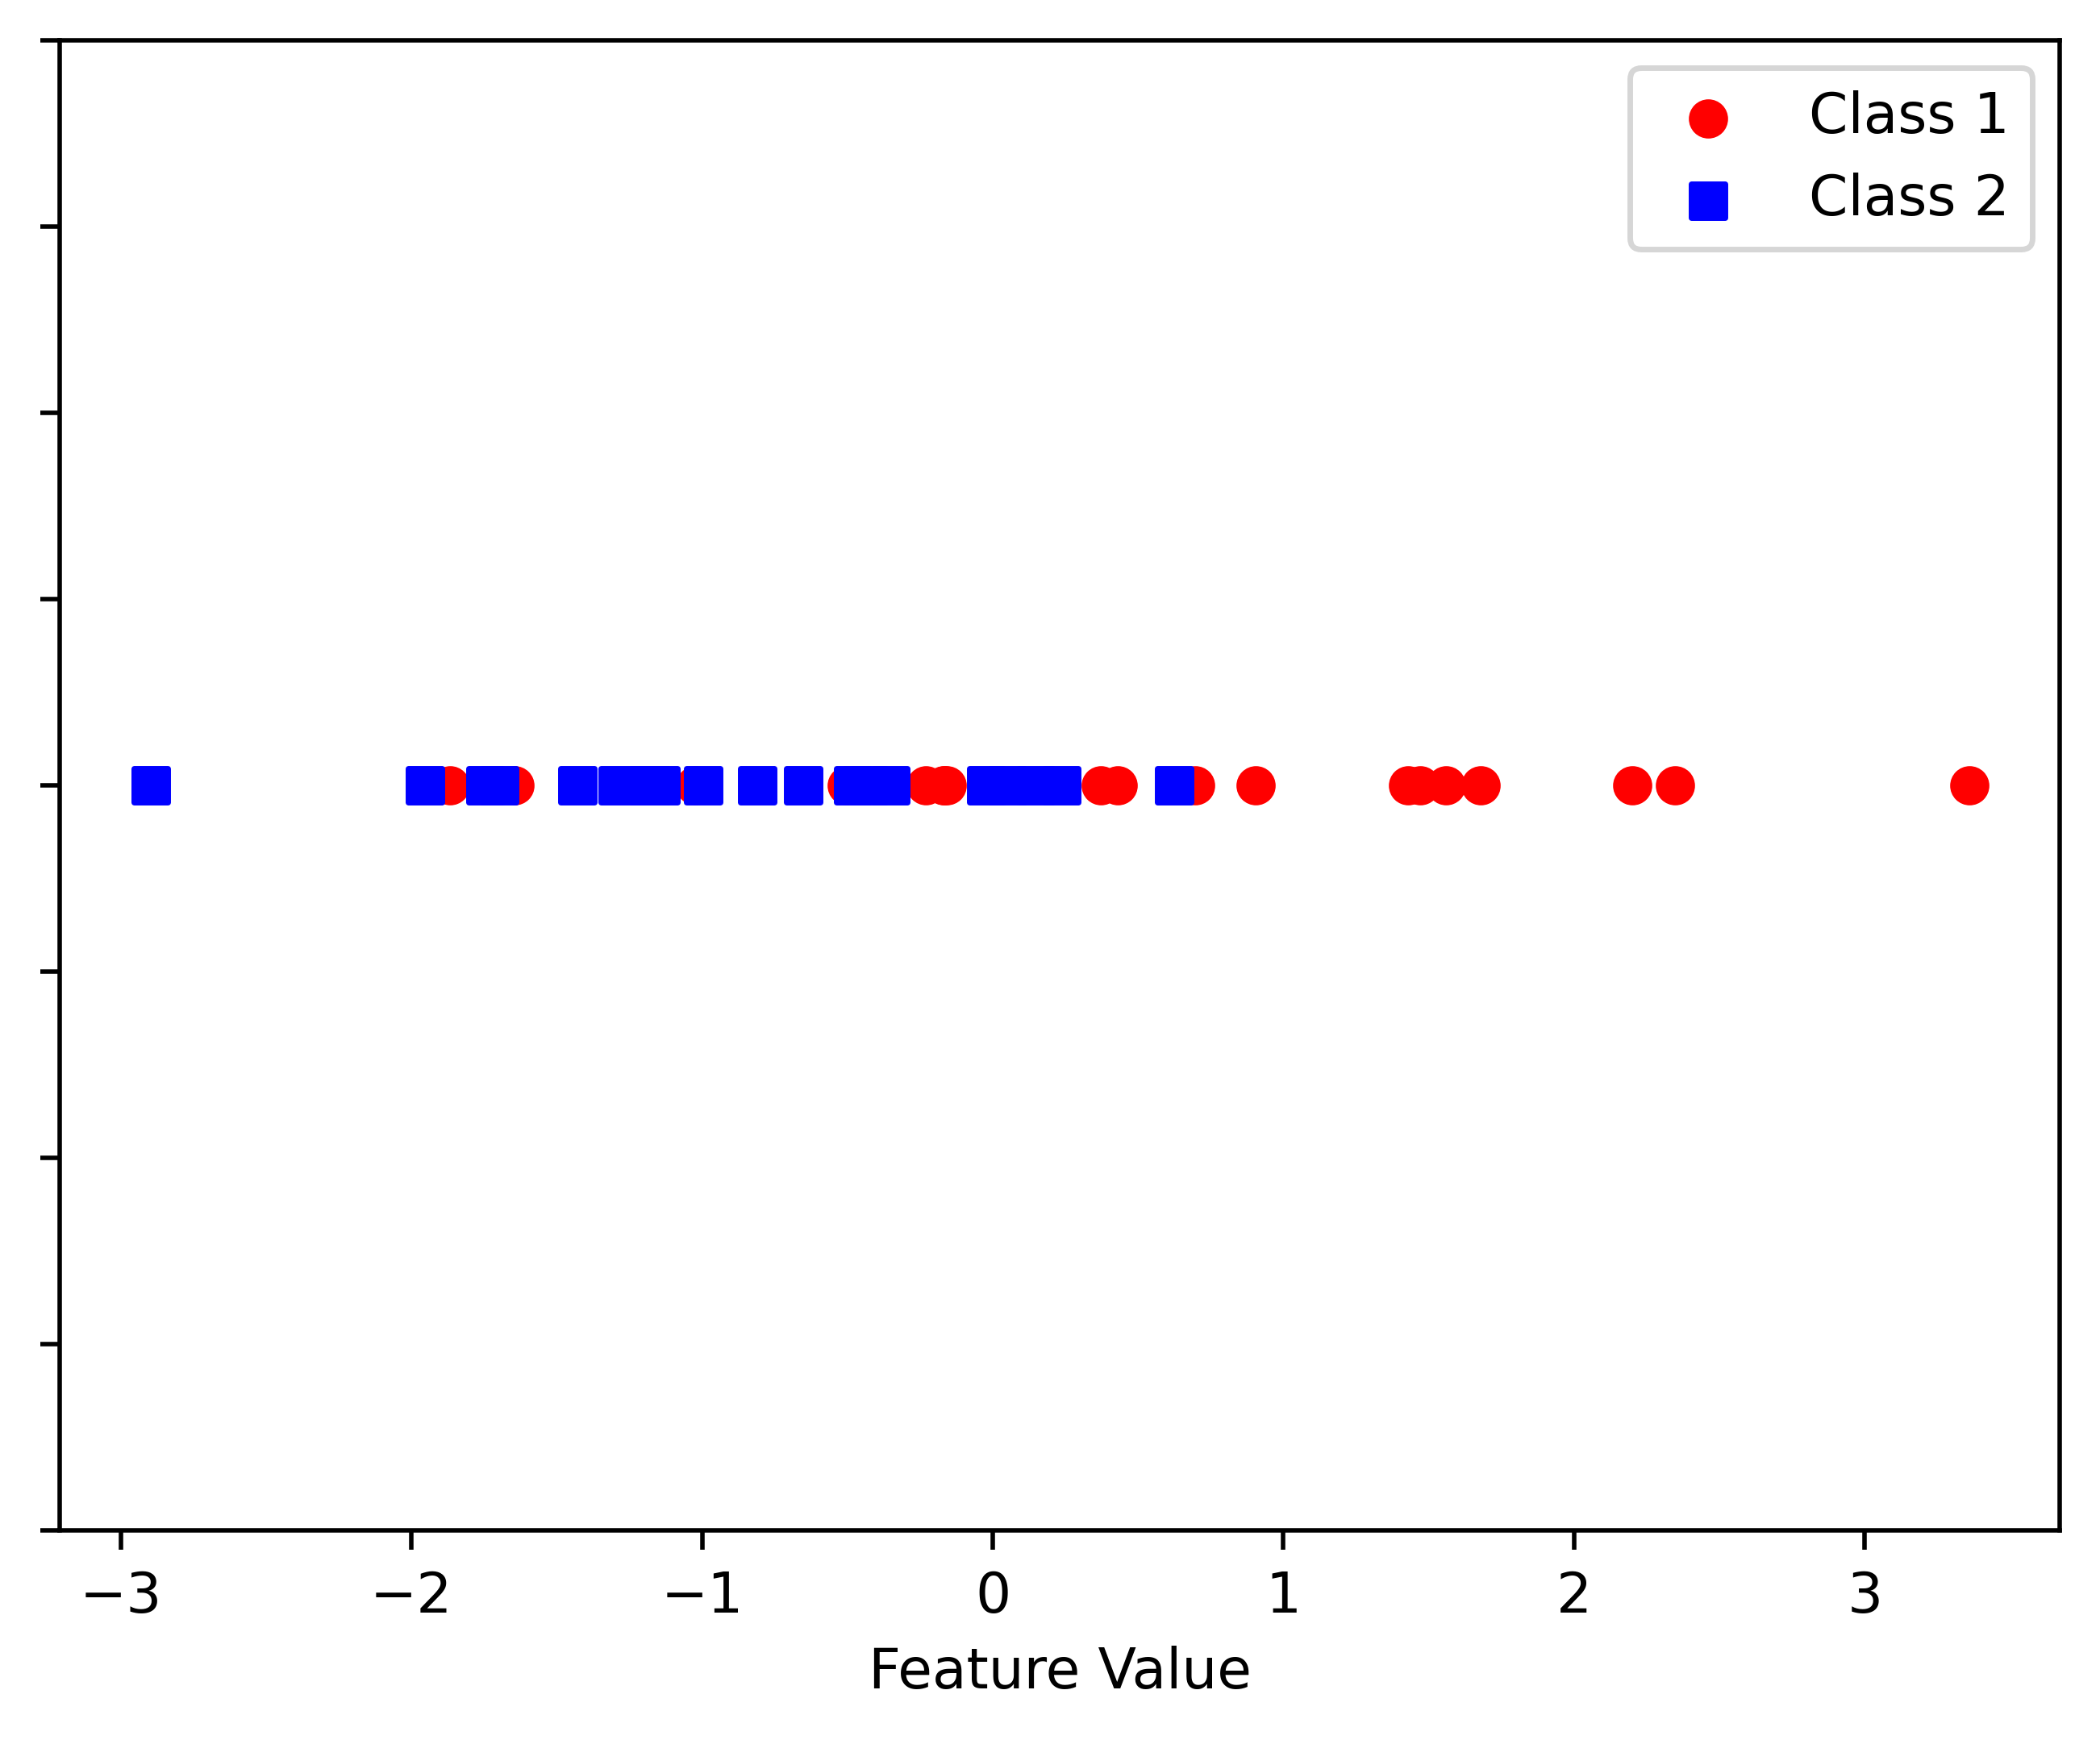

In [9]:
N = 20
y = np.zeros(N)
x1, x2 = np.random.randn(N)+1, np.random.randn(N)-1

ax = plt.figure(dpi=500)
plt.scatter(x1, y, marker='o', c='r', label='Class 1')
plt.scatter(x2, y, marker='s', c='b', label='Class 2')
plt.legend()
plt.xlabel('Feature Value')
plt.ylim([0.02, -0.02])


ax = plt.gca()
ax.axes.yaxis.set_ticklabels([]);
plt.savefig('pdf/tree_1d.pdf')


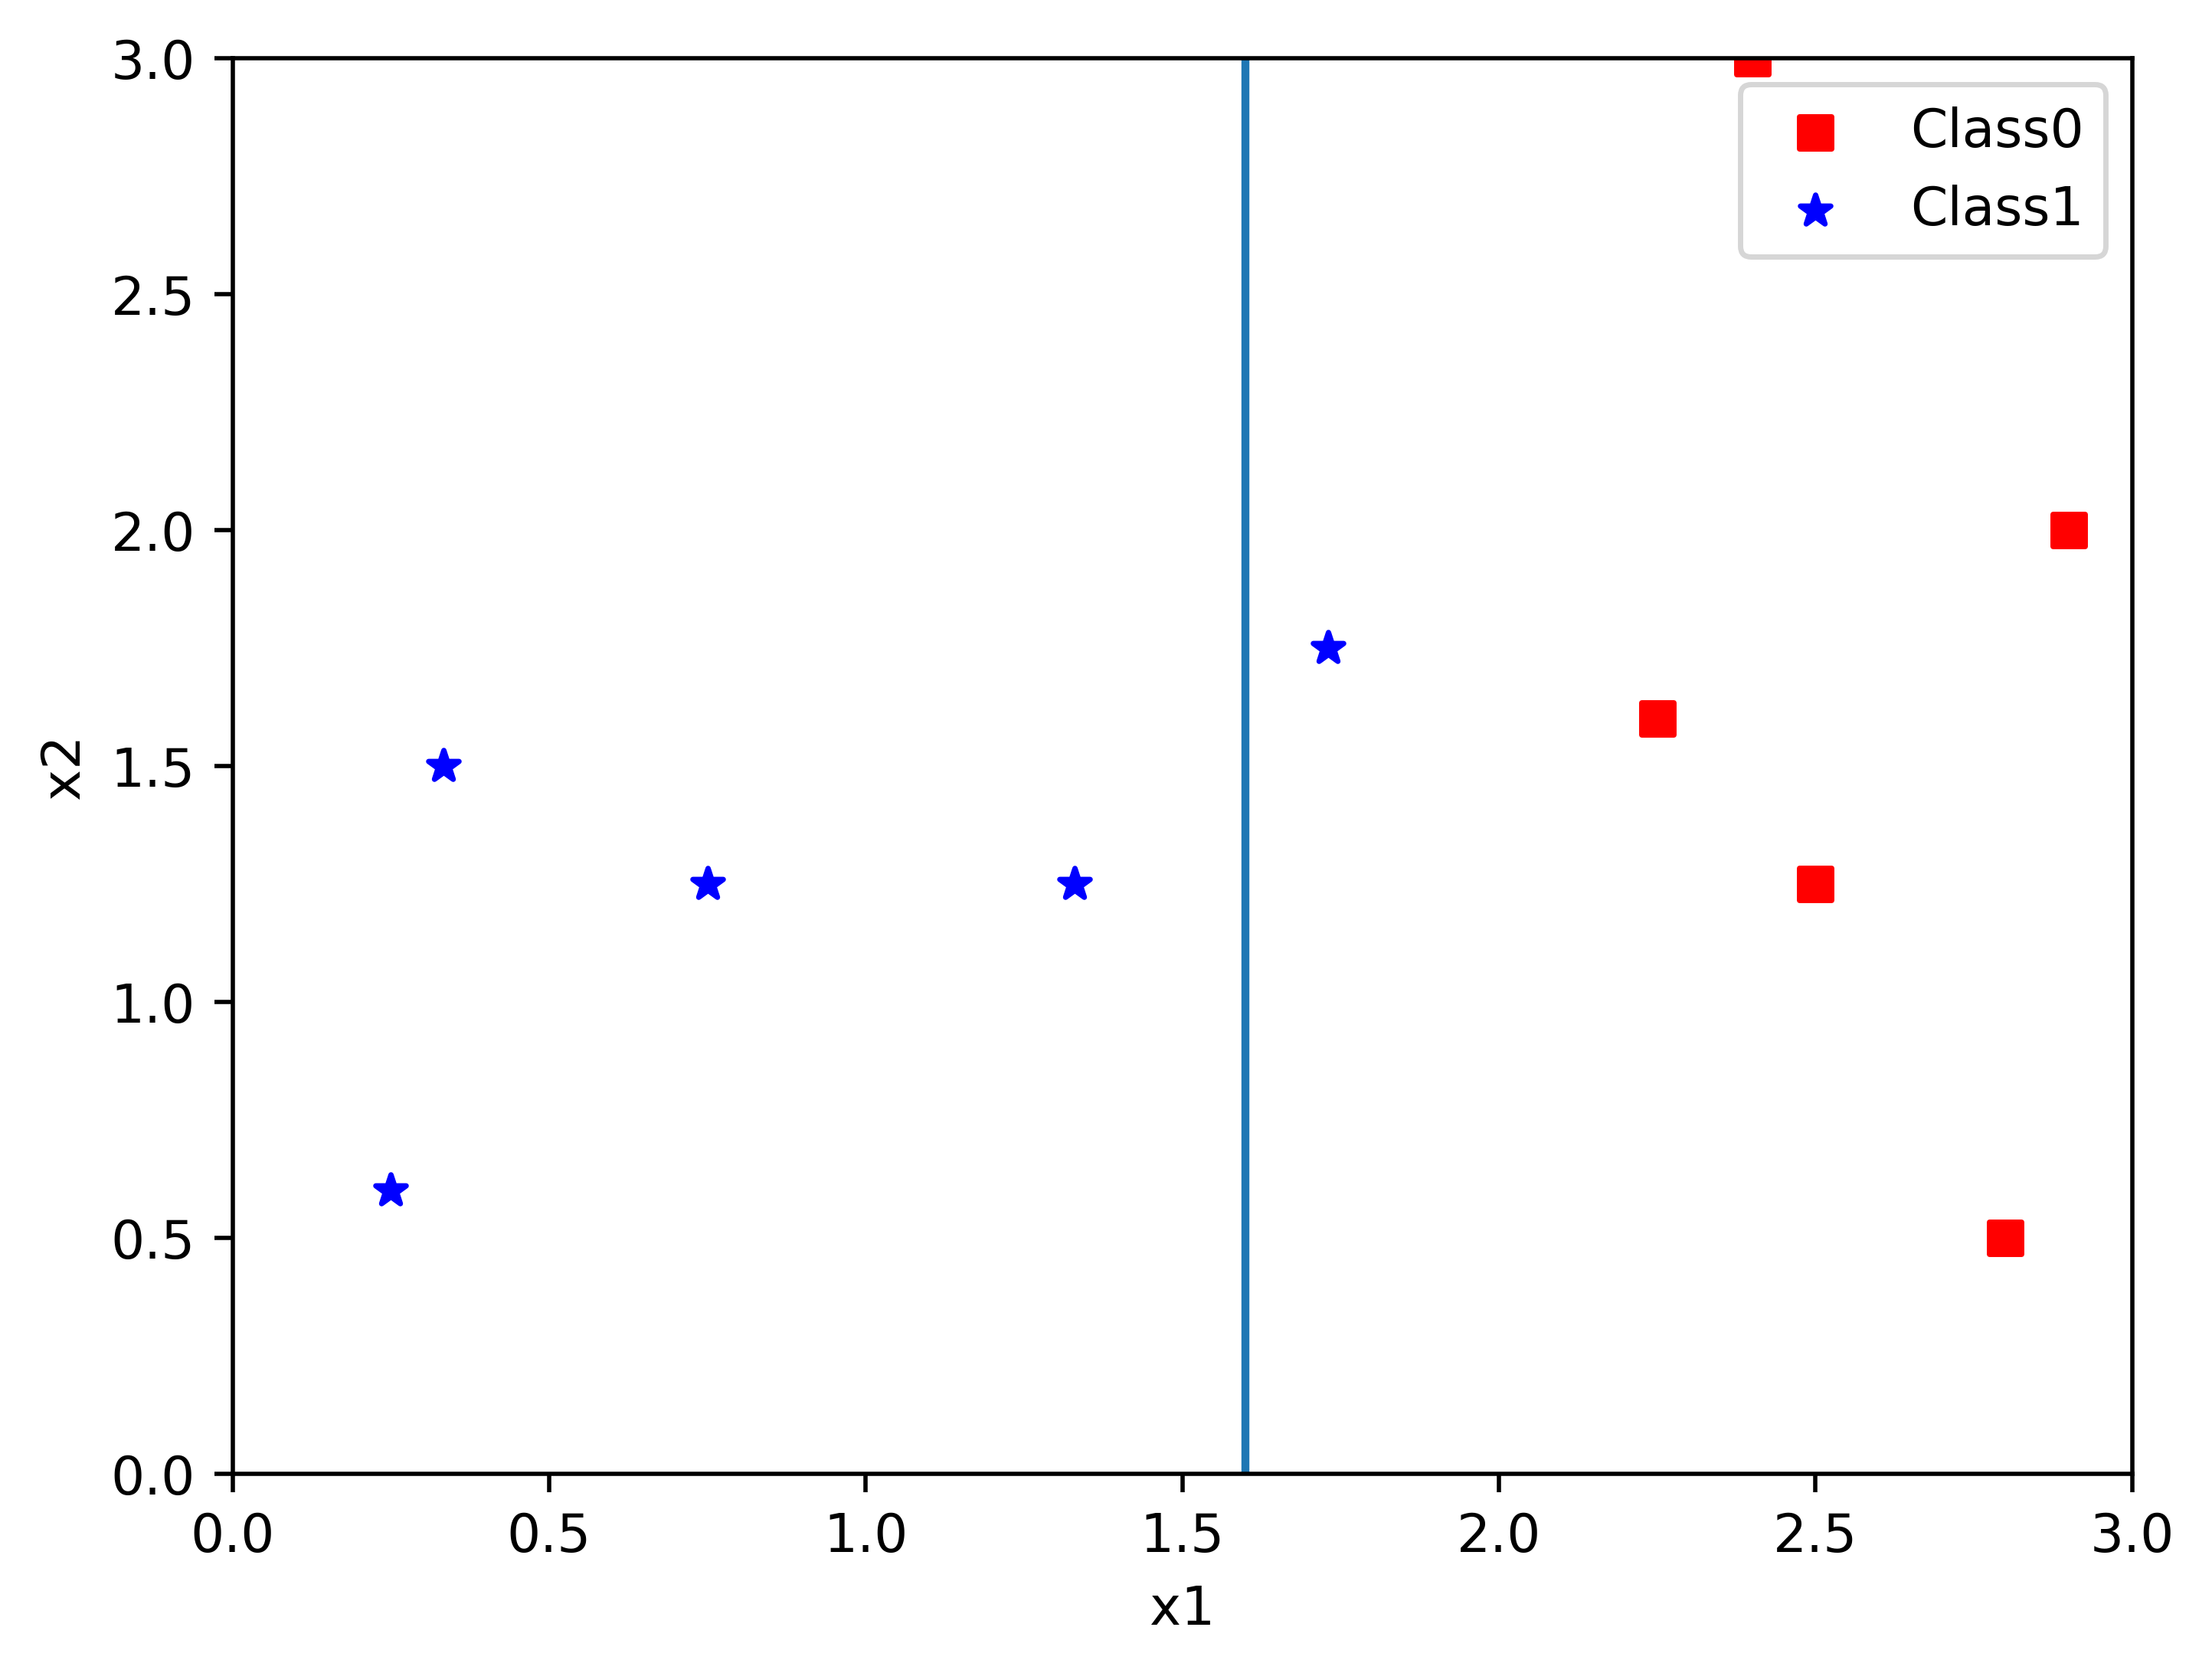

In [10]:
X = [[.333,1.5],
     [.25,.6],
     [.75,1.25],
     [1.33,1.25],
     [1.73,1.75],
     [2.25, 1.6],
     [2.5, 1.25],
     [2.4, 3],
     [2.8,.5],
     [2.9,2]]
X = np.array(X) 
y = np.array([0,0,0,0,0,1,1,1,1,1])

plt.figure(dpi=500)
plt.scatter(X[y==1,0], X[y==1,1], marker='s', c='r', label='Class0')
plt.scatter(X[y==0,0], X[y==0,1], marker='*', c='b', label='Class1')
plt.plot([1.6, 1.6], [0,4])
plt.xlim([0,3])
plt.ylim([0,3])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.savefig('pdf/tree_gini.pdf')

/var/folders/4y/bhytf4755bj542mwhkx2lzqr0000gr/T/ipykernel_5184/3454197655.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/4y/bhytf4755bj542mwhkx2lzqr0000gr/T/ipykernel_5184/3454197655.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/4y/bhytf4755bj542mwhkx2lzqr0000gr/T/ipykernel_5184/3454197655.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/4y/bhytf4755bj542mwhkx2lzqr0000gr/T/ipykernel_5184/3454197655.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/4y/bhytf4755bj542mwhkx2lzqr0000gr/T/ipykernel_5184/3454197655.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/var/folders/4y/bhytf4755bj542mwhkx2lzqr0000gr/T/ipykernel_5184/3

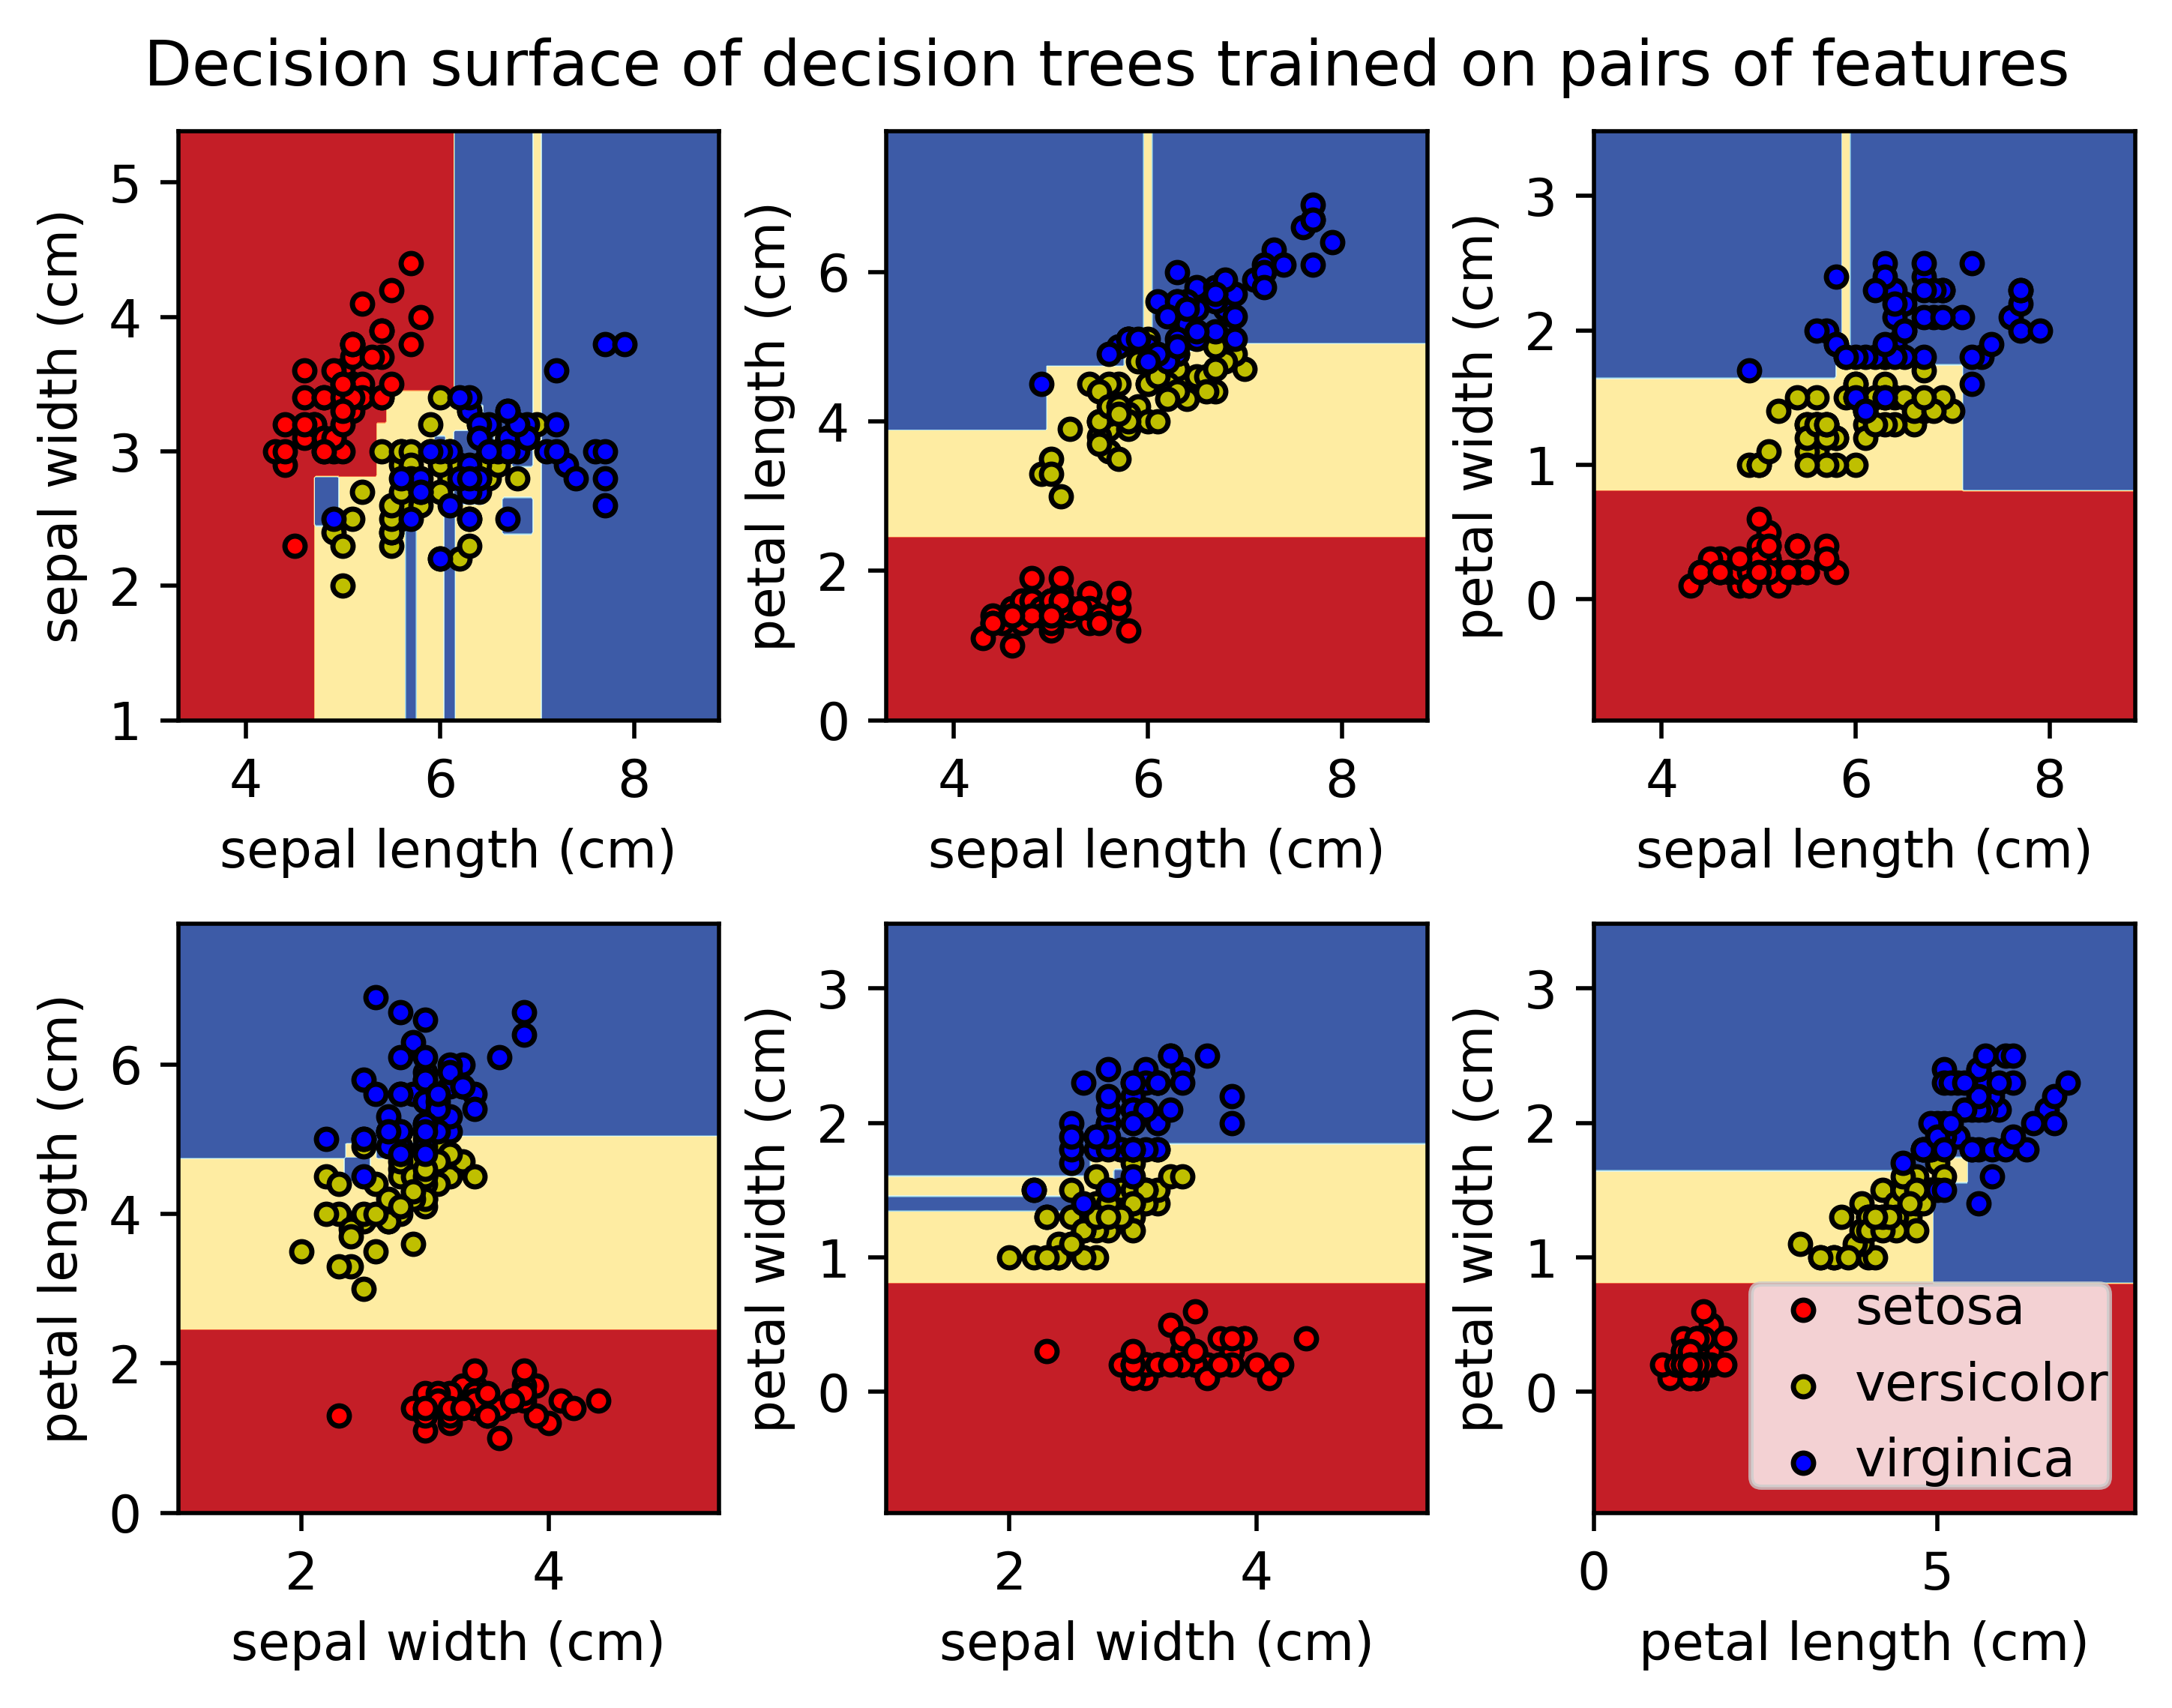

In [16]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


plt.figure(dpi=500)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")
plt.savefig('pdf/tree_iris_plot.pdf')

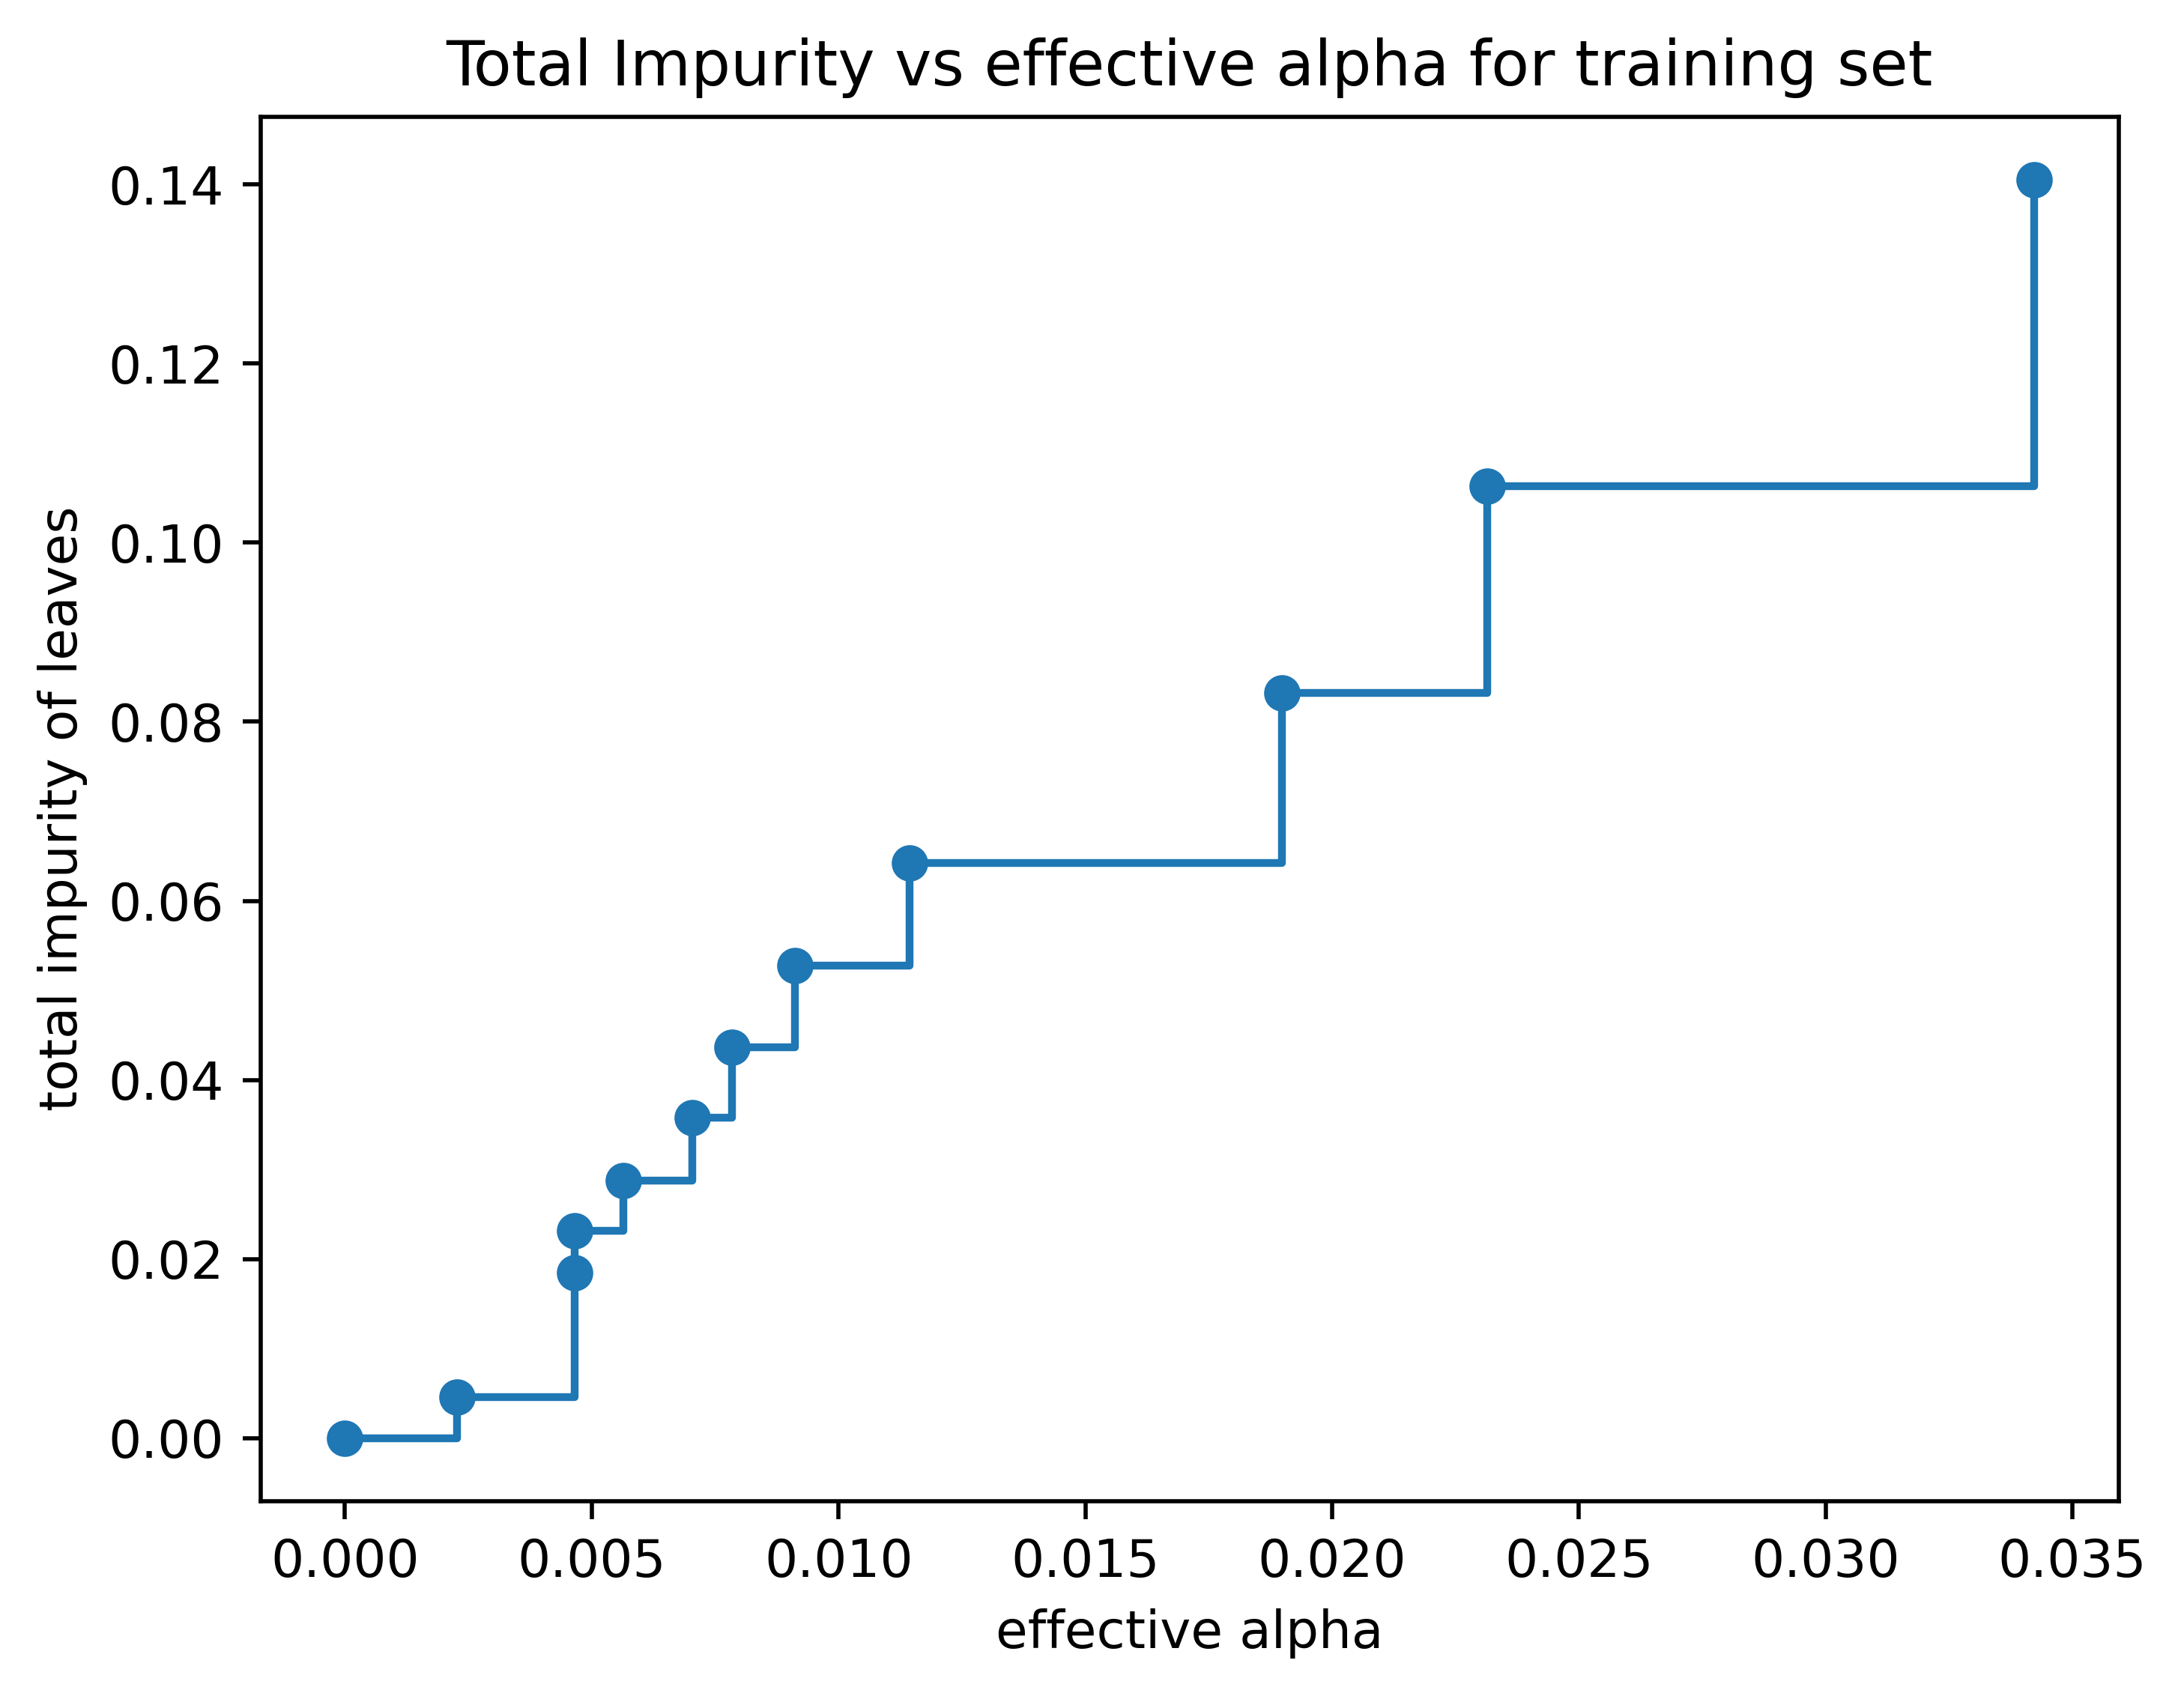

In [29]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(dpi=500)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.savefig('pdf/tree_impurity.pdf')

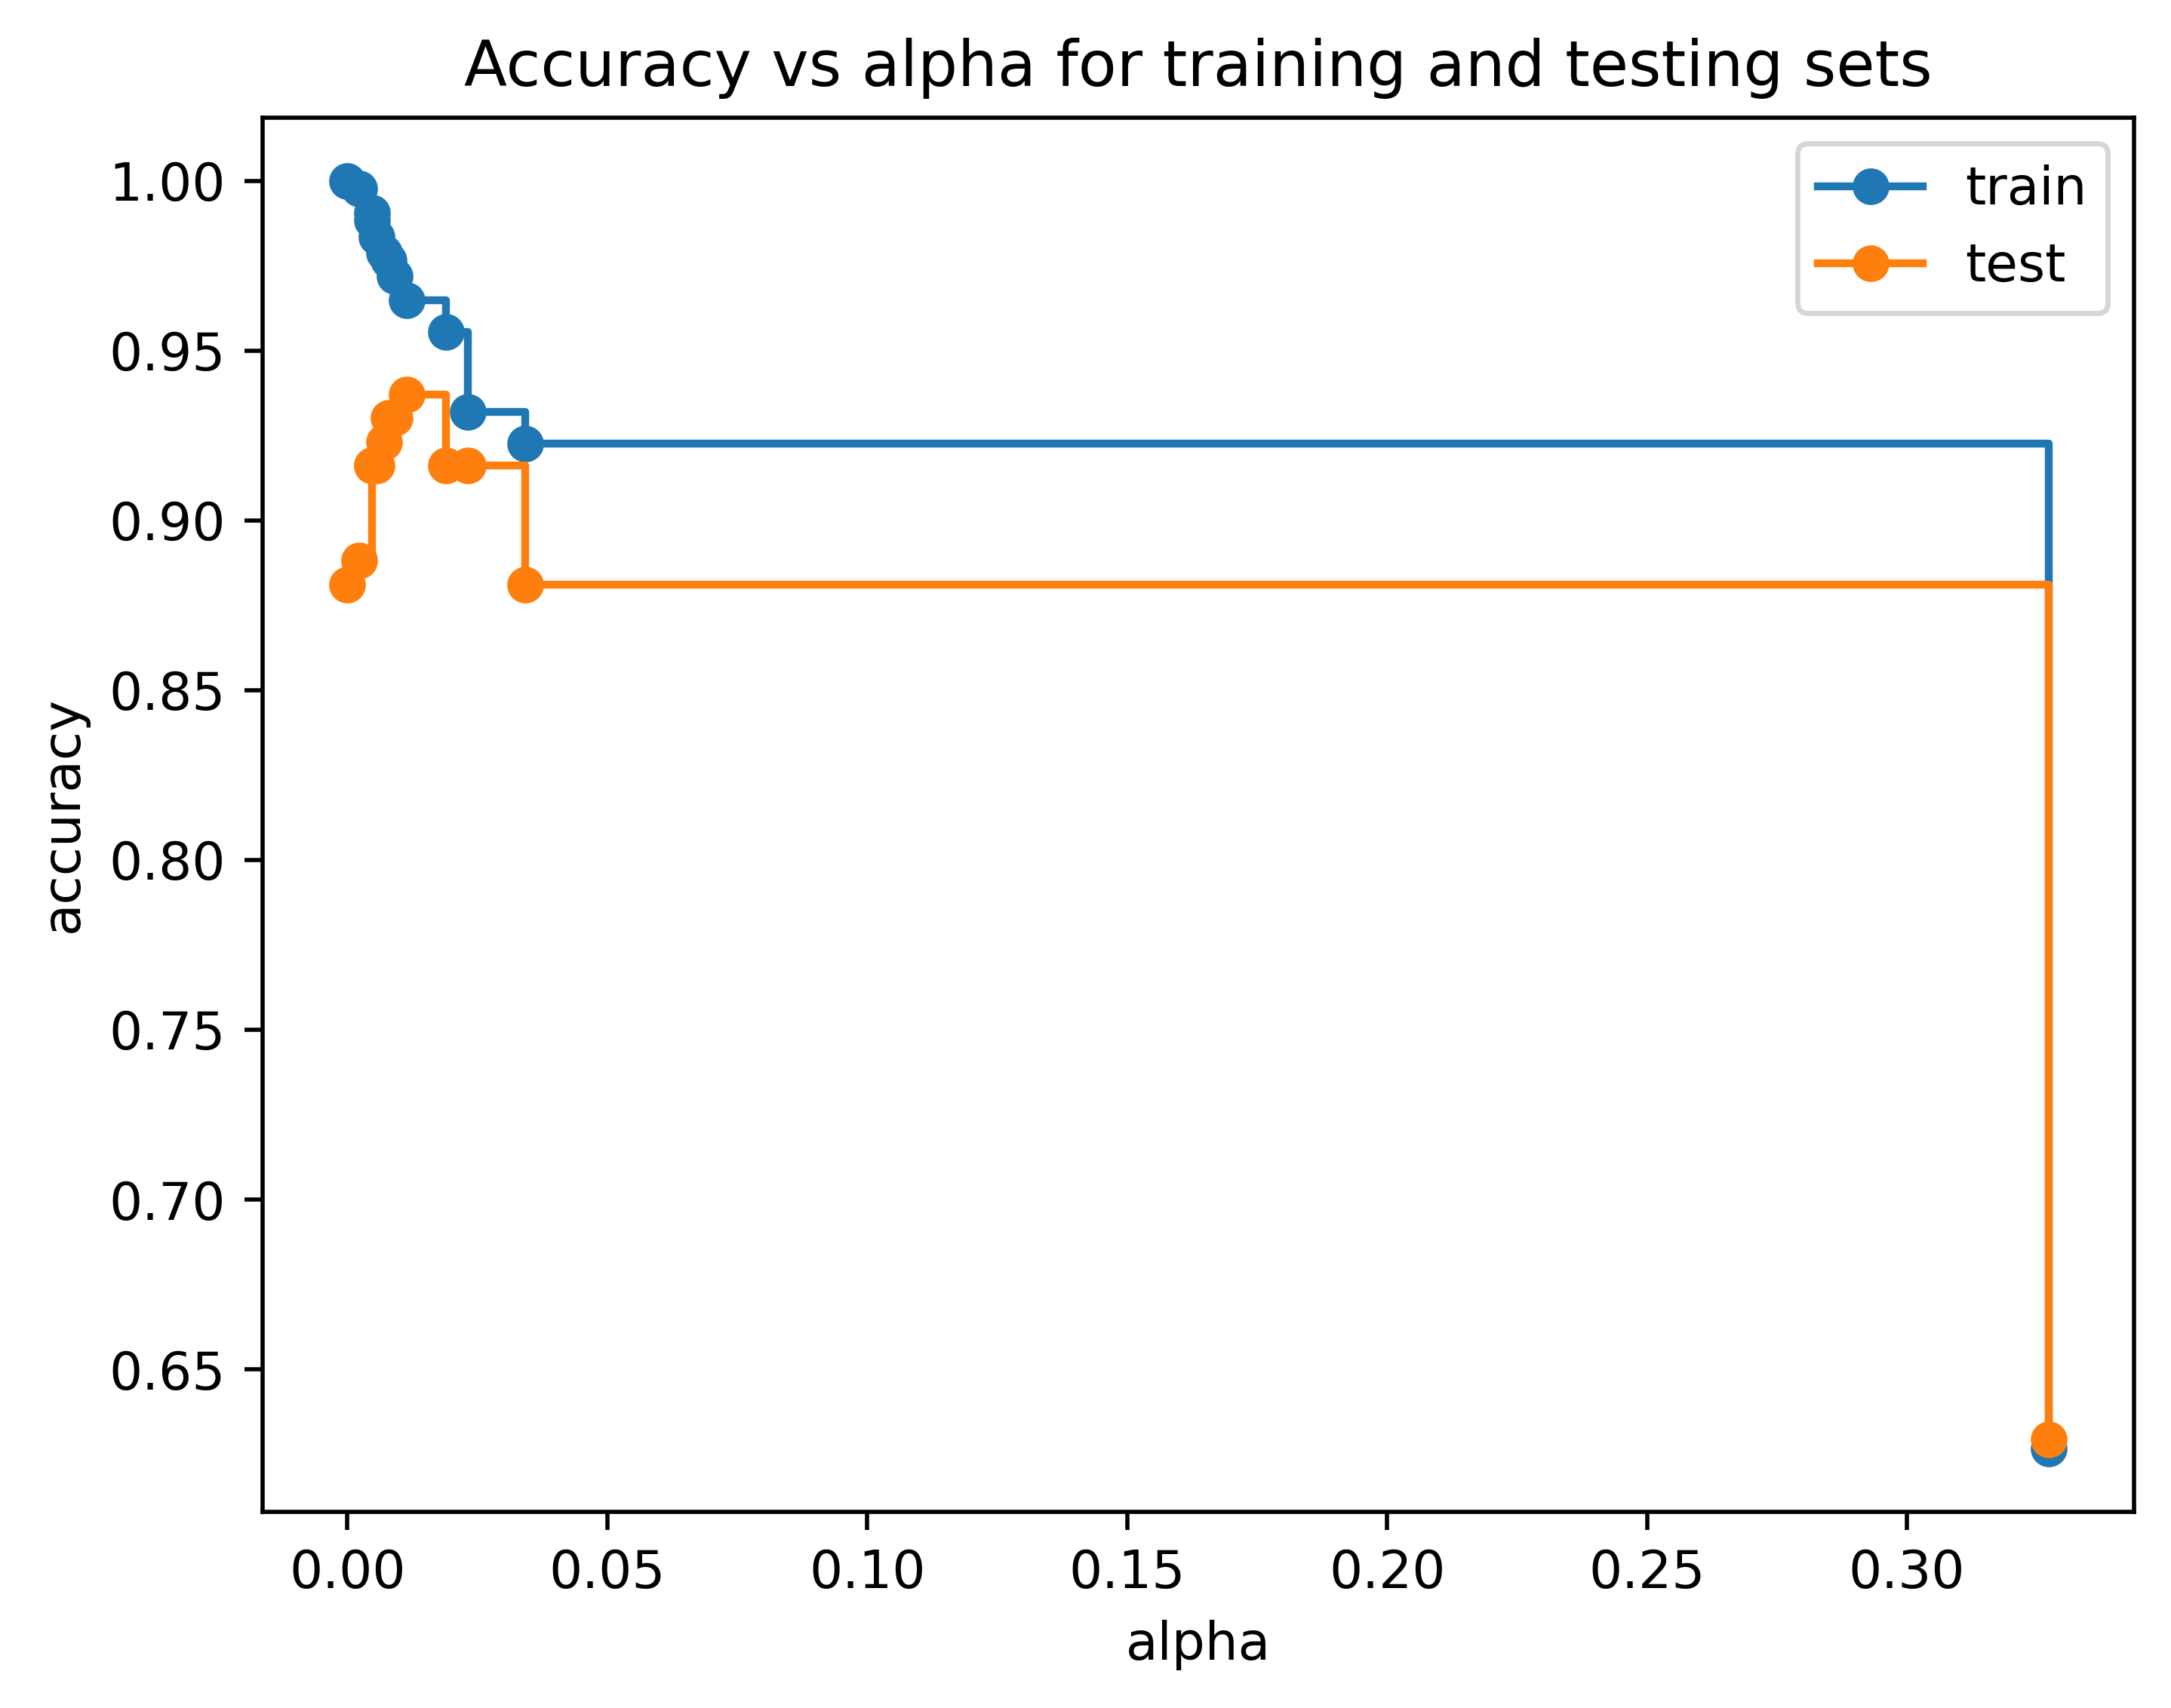

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(dpi=500)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.savefig('pdf/tree_overfit.pdf')

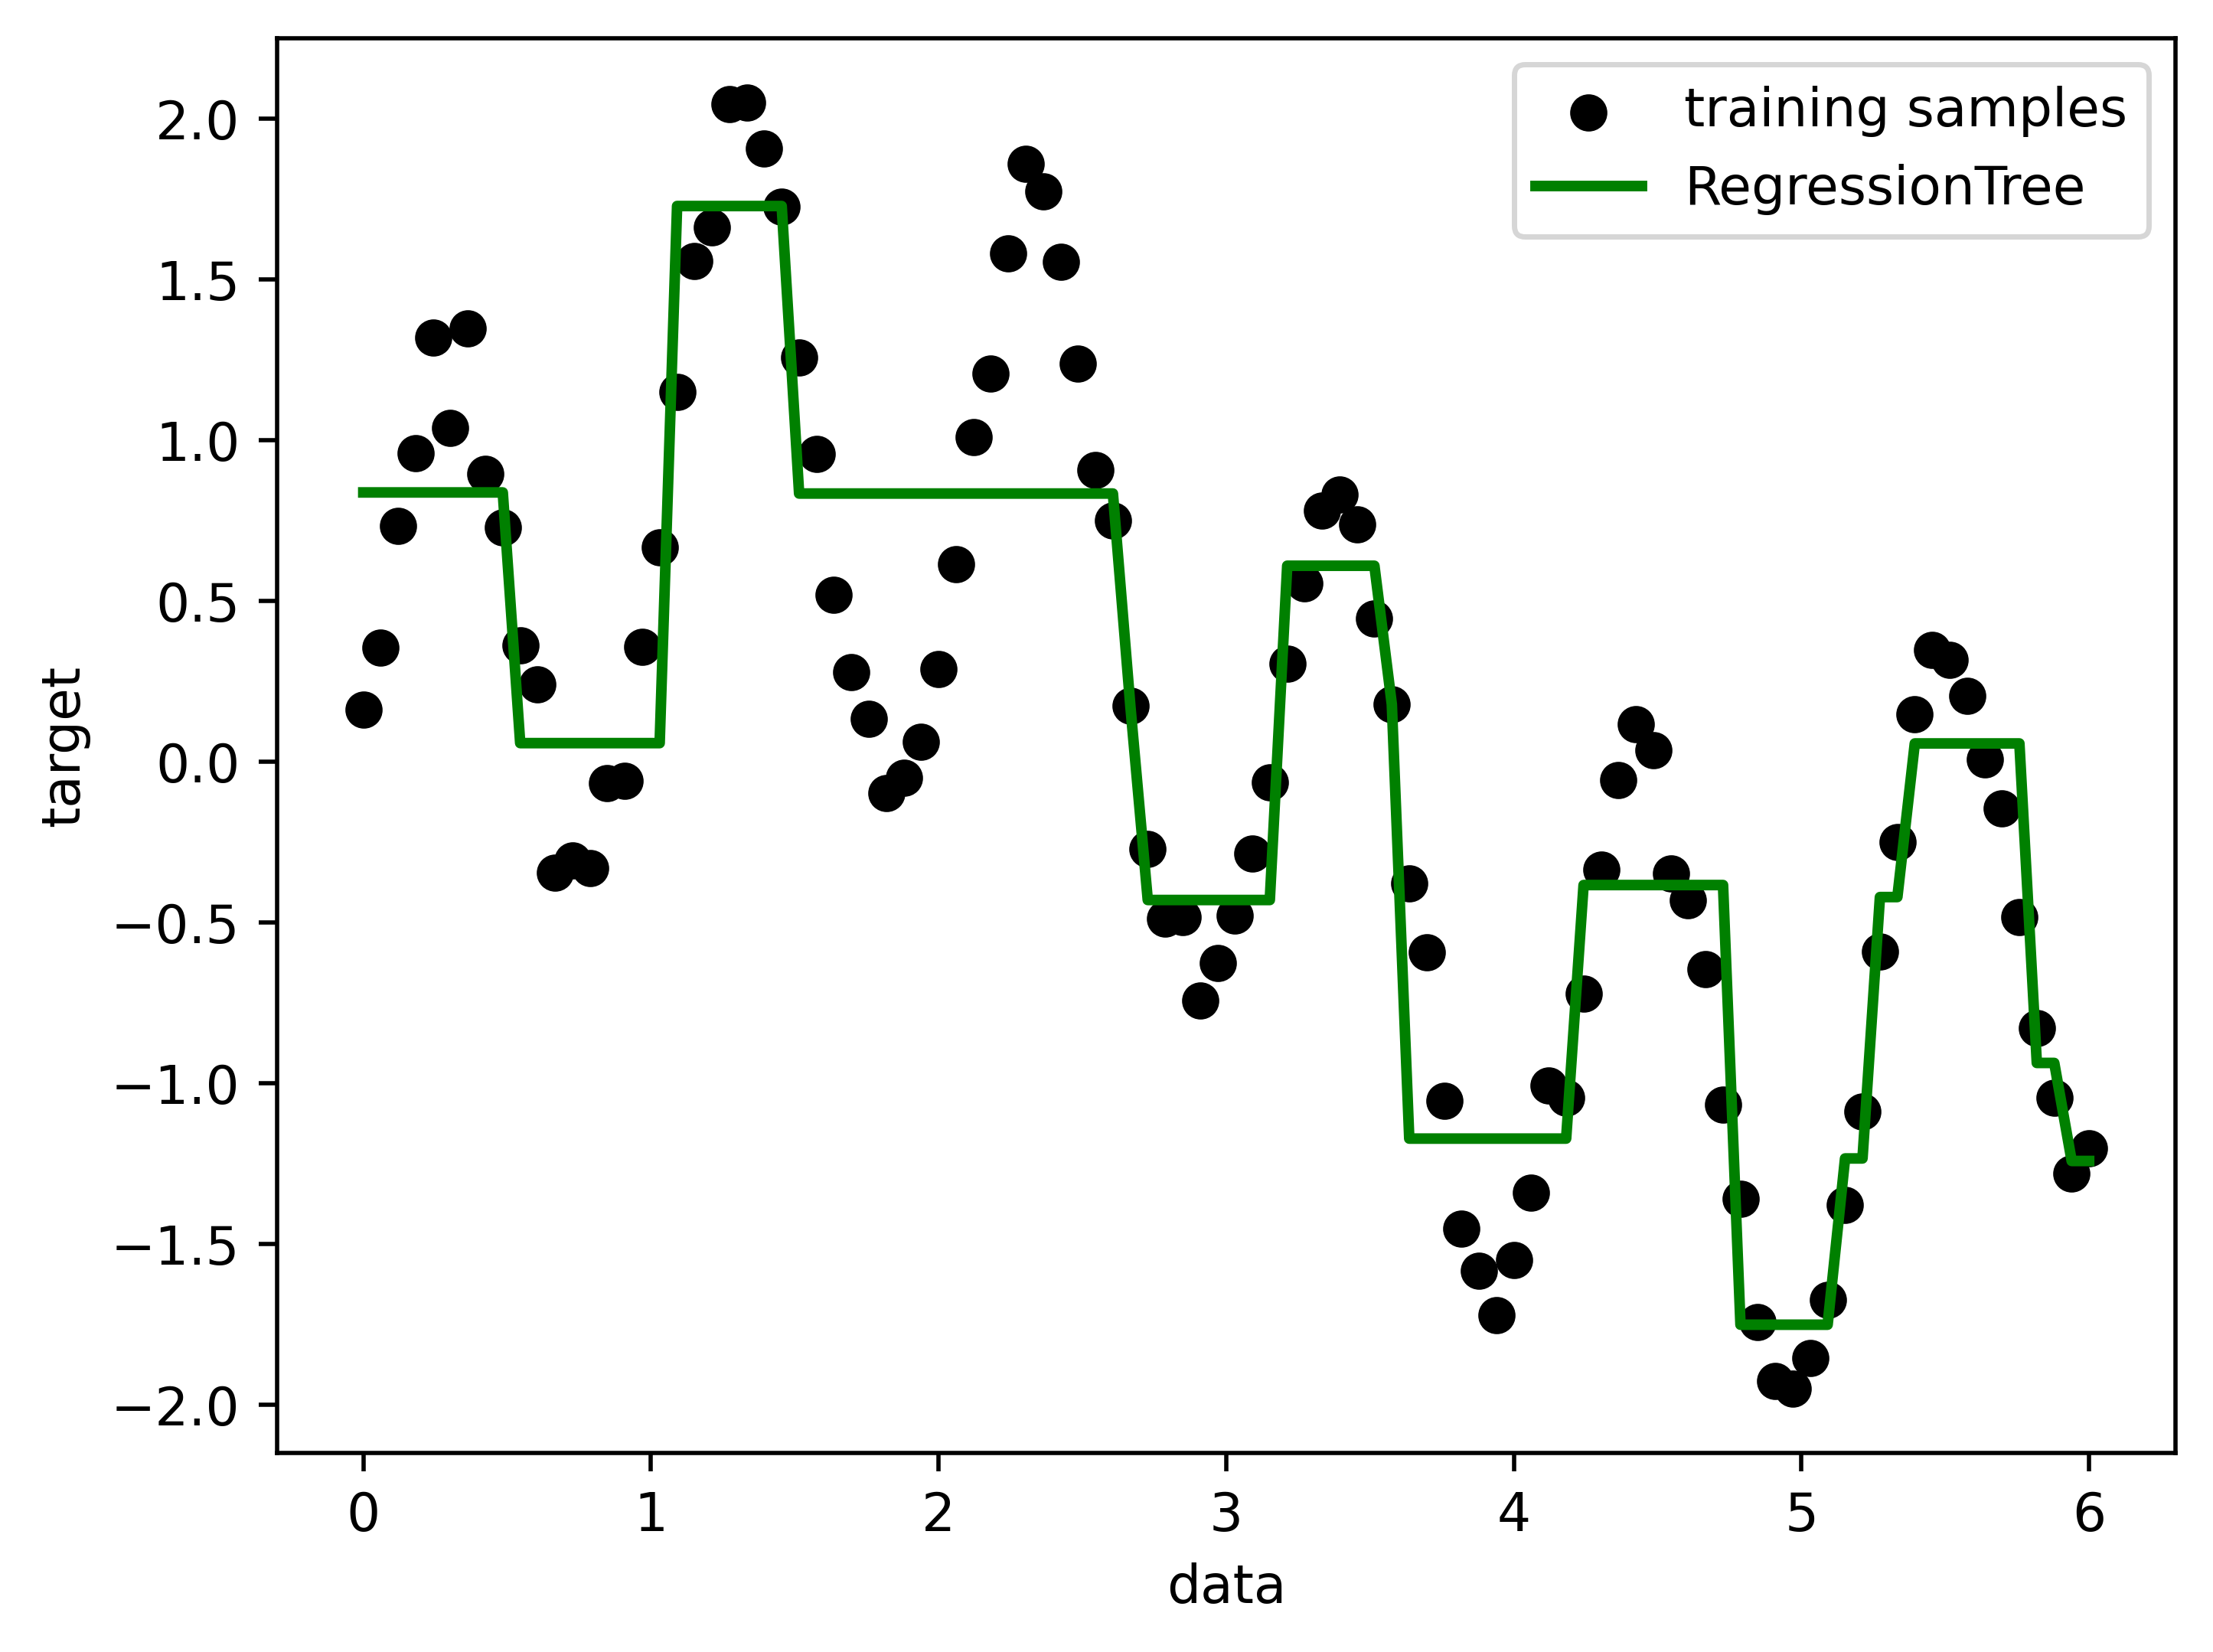

In [34]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
y_1 = tree.DecisionTreeRegressor(max_depth=4).fit(X, y).predict(X)

# Plot the results
plt.figure(dpi=500)
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="RegressionTree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.savefig('pdf/tree_regression.pdf')

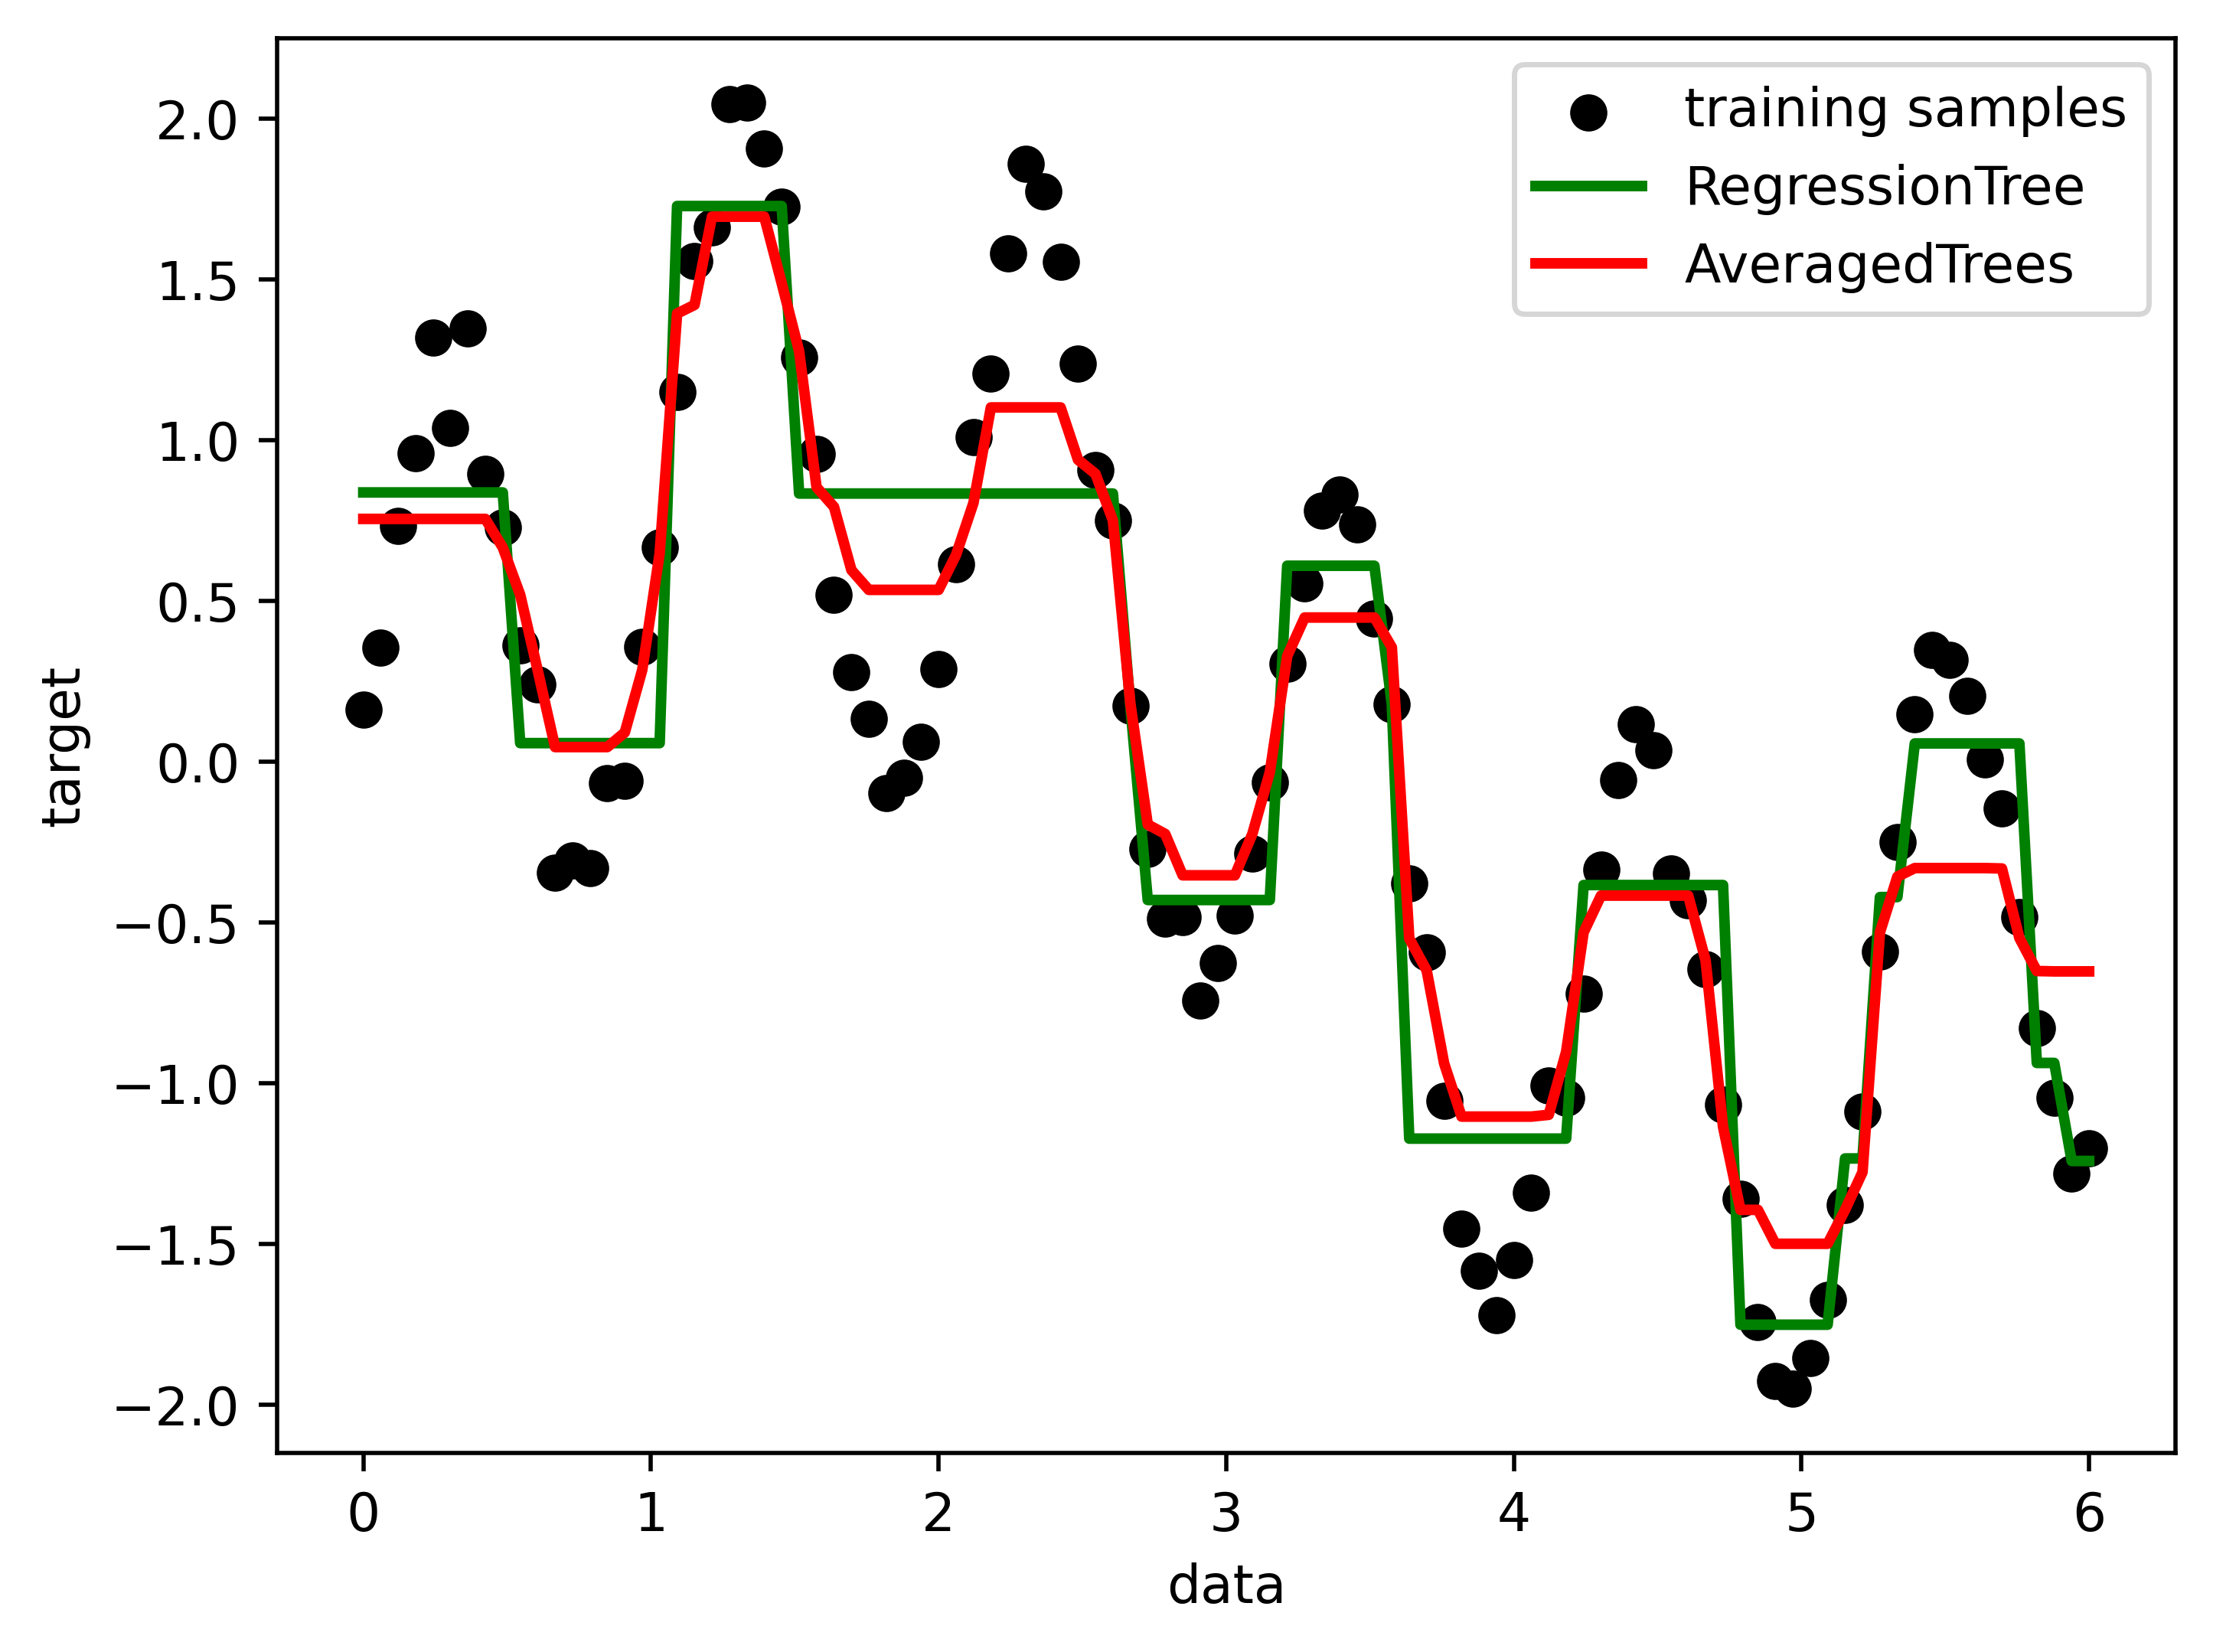

In [37]:
from sklearn.ensemble import AdaBoostRegressor
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
y_1 = tree.DecisionTreeRegressor(max_depth=4).fit(X, y).predict(X)
y_2 = AdaBoostRegressor().fit(X, y).predict(X)

# Plot the results
plt.figure(dpi=500)
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="RegressionTree", linewidth=2)
plt.plot(X, y_2, c="r", label="AveragedTrees", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.savefig('pdf/tree_regression2.pdf')